In [282]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [283]:
datalist = ["banknote","concrete_compression",
            "wine_quality_white","wine_quality_red",
            "california","climate_model_crashes",
            "connectionist_bench_sonar","qsar_biodegradation",
            "yeast","yacht_hydrodynamics"
            ]

In [284]:
result_folder = "../results"
n_method = os.listdir(result_folder)

In [20]:
n_method

['baselines',
 'hyperimputer',
 'miracle',
 'miwae',
 'notmiwae',
 'ot_linear',
 'ot_mlp']

In [285]:
result_folder = "../results"
n_method = os.listdir(result_folder)

for method in n_method:
    for dataset in datalist:
        file_name_1 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse.csv"
        file_name_2 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse_ratio.csv"
        file_name_3 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse_ratio_.csv"
        if os.path.exists(file_name_1) or os.path.exists(file_name_2) or os.path.exists(file_name_3):
            pass
        else:
            print(f"No data found: {method} {dataset}")

No data found: miwae banknote
No data found: miwae concrete_compression
No data found: miwae wine_quality_white
No data found: miwae wine_quality_red
No data found: miwae california
No data found: miwae climate_model_crashes
No data found: miwae connectionist_bench_sonar
No data found: miwae qsar_biodegradation
No data found: miwae yeast
No data found: miwae yacht_hydrodynamics
No data found: notmiwae banknote
No data found: notmiwae concrete_compression
No data found: notmiwae wine_quality_white
No data found: notmiwae wine_quality_red
No data found: notmiwae california
No data found: notmiwae climate_model_crashes
No data found: notmiwae connectionist_bench_sonar
No data found: notmiwae qsar_biodegradation
No data found: notmiwae yeast
No data found: notmiwae yacht_hydrodynamics
No data found: ot_linear banknote
No data found: ot_linear concrete_compression
No data found: ot_linear wine_quality_white
No data found: ot_linear wine_quality_red
No data found: ot_linear california
No dat

In [22]:

for dataset in datalist:
    merged_df = pd.DataFrame()
    for method in n_method:
        file_name_1 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse.csv"
        file_name_2 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse_ratio.csv"
        file_name_3 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse_ratio_.csv"

        if os.path.exists(file_name_1):
            df = pd.read_csv(file_name_1)
            merged_df = pd.concat([merged_df, df],axis=1)
        
        if os.path.exists(file_name_2):
            df = pd.read_csv(file_name_2)
            merged_df = pd.concat([merged_df, df], axis=1)
        
        if os.path.exists(file_name_3):
            df = pd.read_csv(file_name_3)
            merged_df = pd.concat([merged_df, df], axis=1)

    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
    print(merged_df)  
    break


   Missing_Rule      Mean      Mice  Missforest       KNN  hyper_RMSE  \
0           0.1  0.479832  0.347081    0.288692  0.427301    0.333593   
1           0.2  0.511231  0.397665    0.341414  0.568885    0.389953   
2           0.3  0.575138  0.506308    0.477986  0.627639    0.491752   
3           0.4  0.653980  0.625532    0.554713  0.688540    0.565495   
4           0.5  0.760473  0.821506    0.684277  0.789848    0.753018   
5           0.6  0.889135  0.930416    0.821655  0.873761    0.887265   
6           0.7  1.237117  1.251600    1.240356  1.233285    1.182262   
7           0.8  1.592553  1.611186    1.568493  1.592800    1.624137   
8           0.9  0.889135  0.930416    0.821655  0.873761    0.887265   

   miracle_RMSE  
0      3.873682  
1      3.851360  
2      3.829605  
3      3.805328  
4      3.815233  
5      3.864354  
6      3.641934  
7      3.451444  
8      3.864354  


## Diffuse RMSE

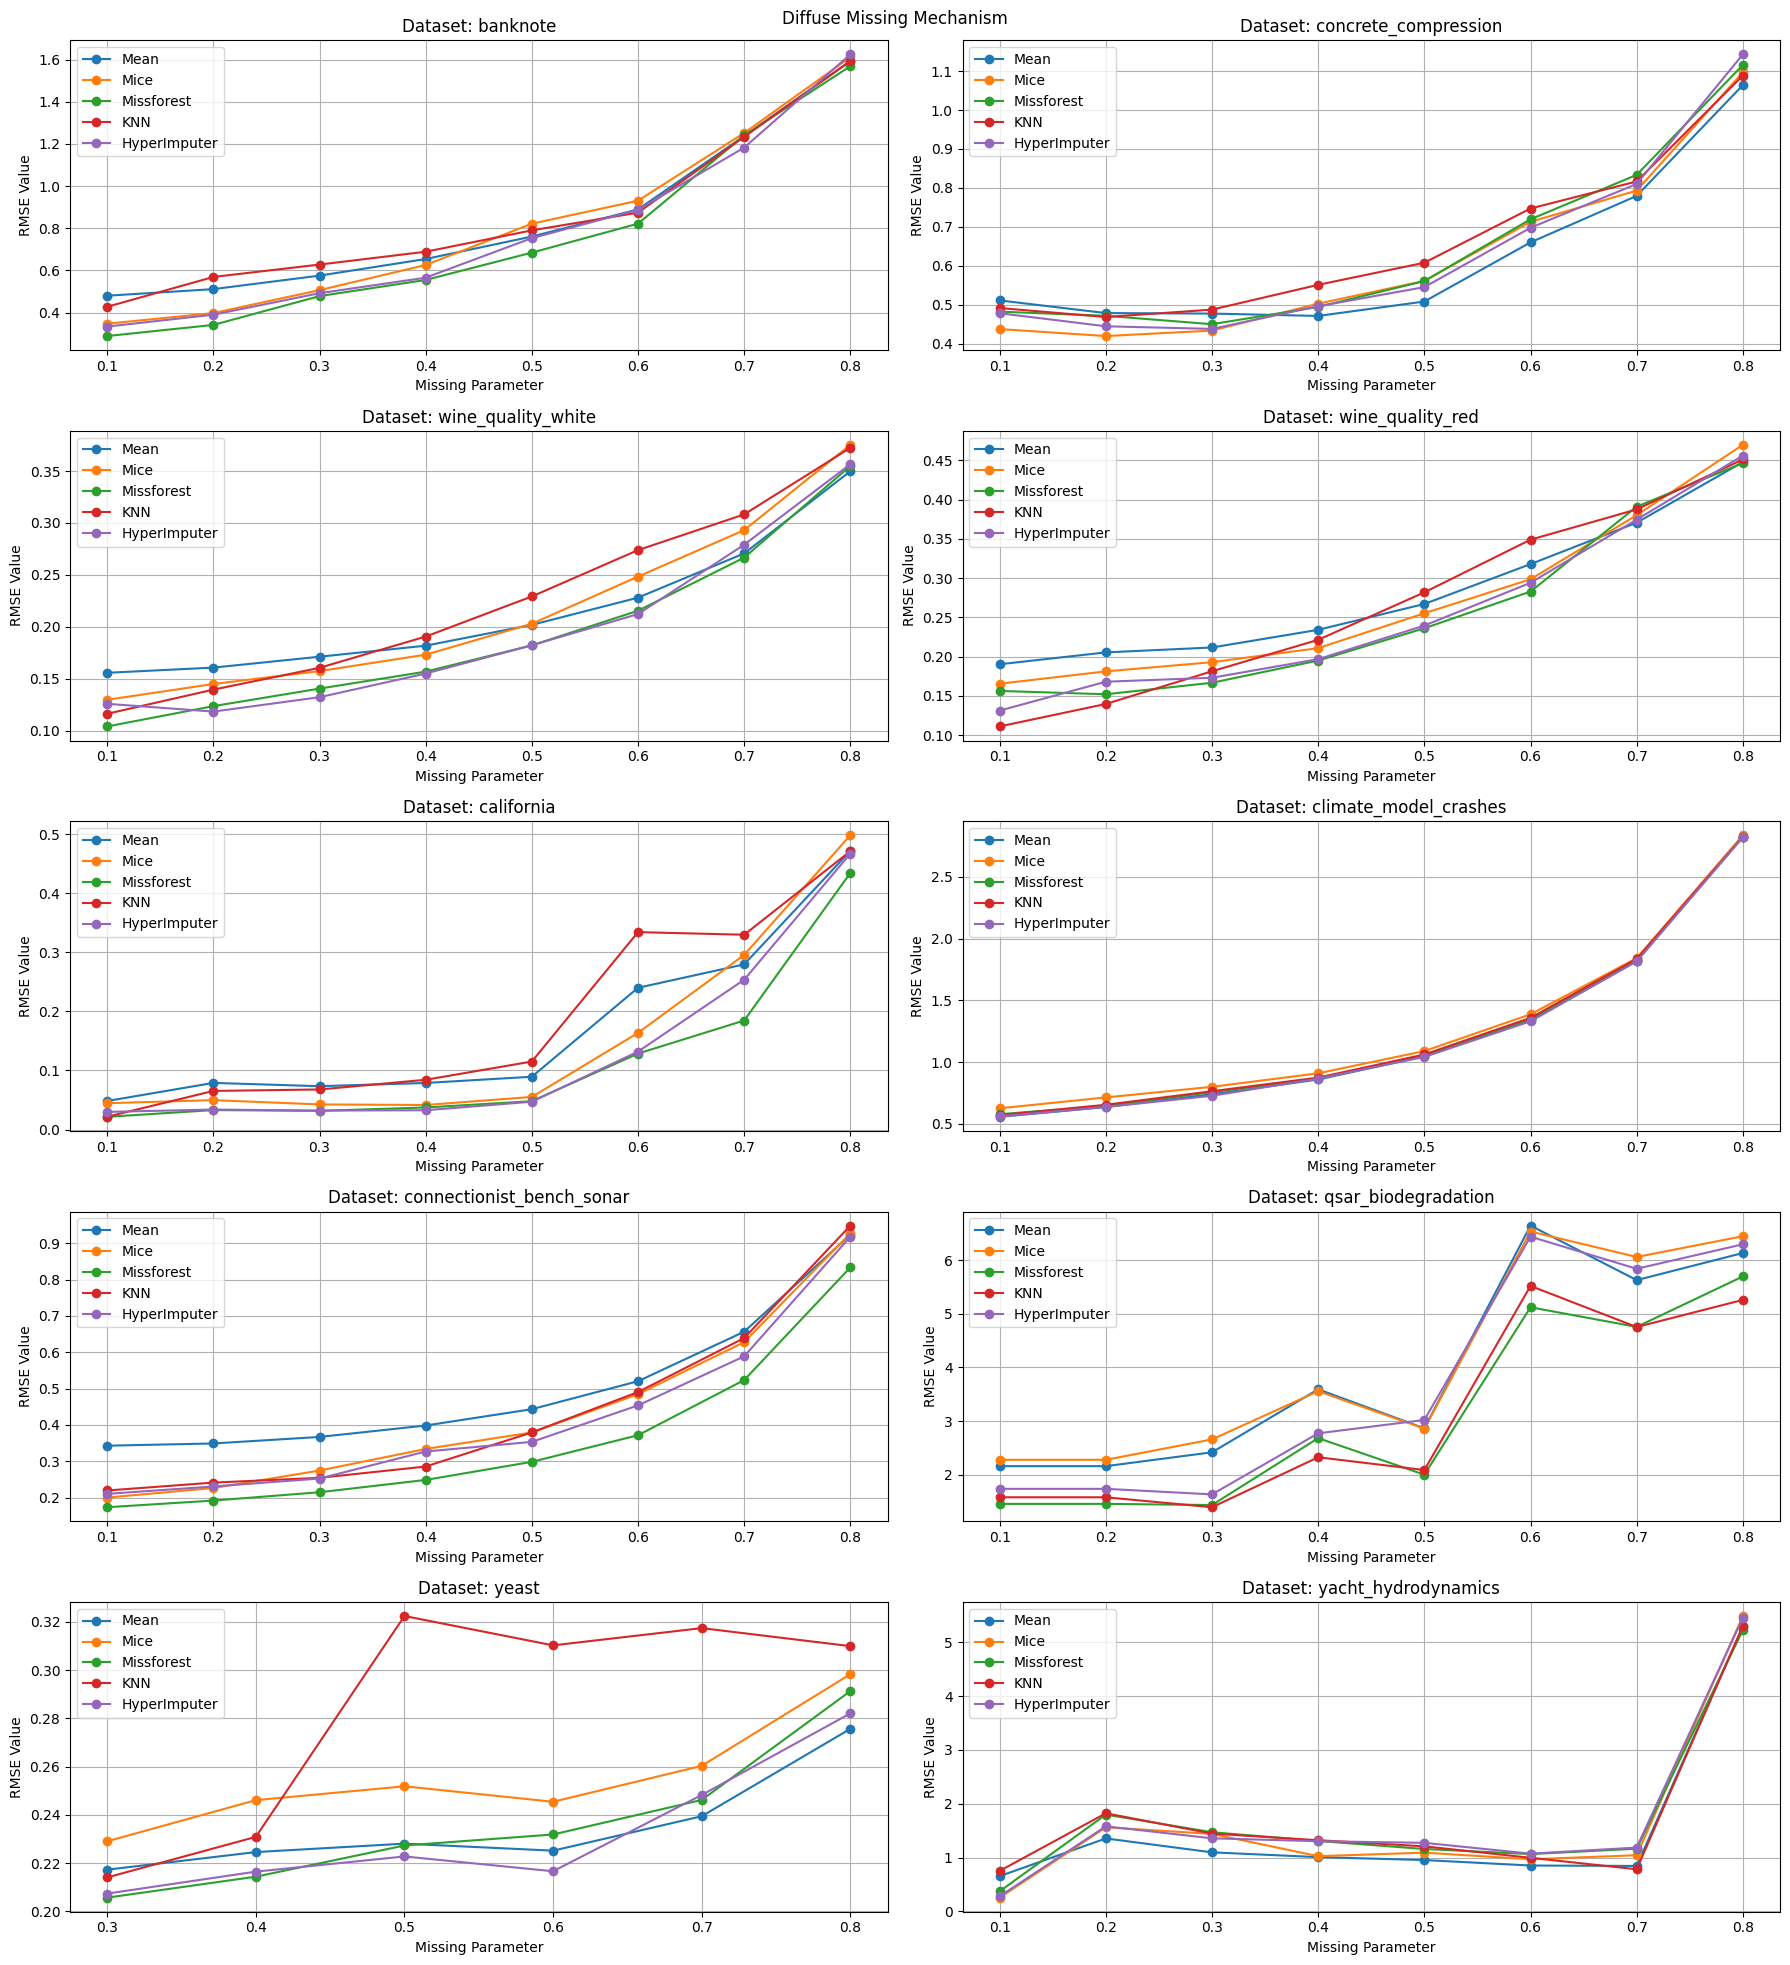

In [23]:
datalist = ["banknote","concrete_compression",
            "wine_quality_white","wine_quality_red",
            "california","climate_model_crashes",
            "connectionist_bench_sonar","qsar_biodegradation",
            "yeast","yacht_hydrodynamics"
            ]

columns_to_plot = ['Mean', 'Mice', 'Missforest', 'KNN', 'HyperImputer']

# Create subplots with 5 rows and 2 columns
fig, axs = plt.subplots(5, 2, figsize=(18, 20))  # Adjust figsize as needed

# Flatten the axs array to iterate over subplots
axs = axs.flatten()

# Loop through each dataset and create a subplot
for i, dataset in enumerate(datalist):
    merged_df = pd.DataFrame()
    for method in n_method:
        file_name_1 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse.csv"
        file_name_2 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse_ratio.csv"
        file_name_3 = f"{result_folder}/{method}/RMSE_{dataset}_diffuse_ratio_.csv"

        if os.path.exists(file_name_1):
            df = pd.read_csv(file_name_1)
            merged_df = pd.concat([merged_df, df], axis=1)

        if os.path.exists(file_name_2):
            df = pd.read_csv(file_name_2)
            merged_df = pd.concat([merged_df, df], axis=1)

        if os.path.exists(file_name_3):
            df = pd.read_csv(file_name_3)
            merged_df = pd.concat([merged_df, df], axis=1)

    merged_df.rename(columns={'hyper_RMSE': 'HyperImputer'}, inplace=True)
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
    merged_df = merged_df.iloc[:-1]
    # Plot each column on a separate subplot
    for j, column in enumerate(columns_to_plot):
        axs[i].plot(merged_df['Missing_Rule'], merged_df[column], label=column, marker='o')
    axs[i].set_title(f'Dataset: {dataset}')
    axs[i].set_xlabel('Missing Parameter')
    axs[i].set_ylabel('RMSE Value')
    axs[i].legend()
    axs[i].grid(True)

plt.suptitle("Diffuse Missing Mechanism")
# Adjust layout
plt.tight_layout()


# Show the subplots
plt.show()

## Logistic RMSE

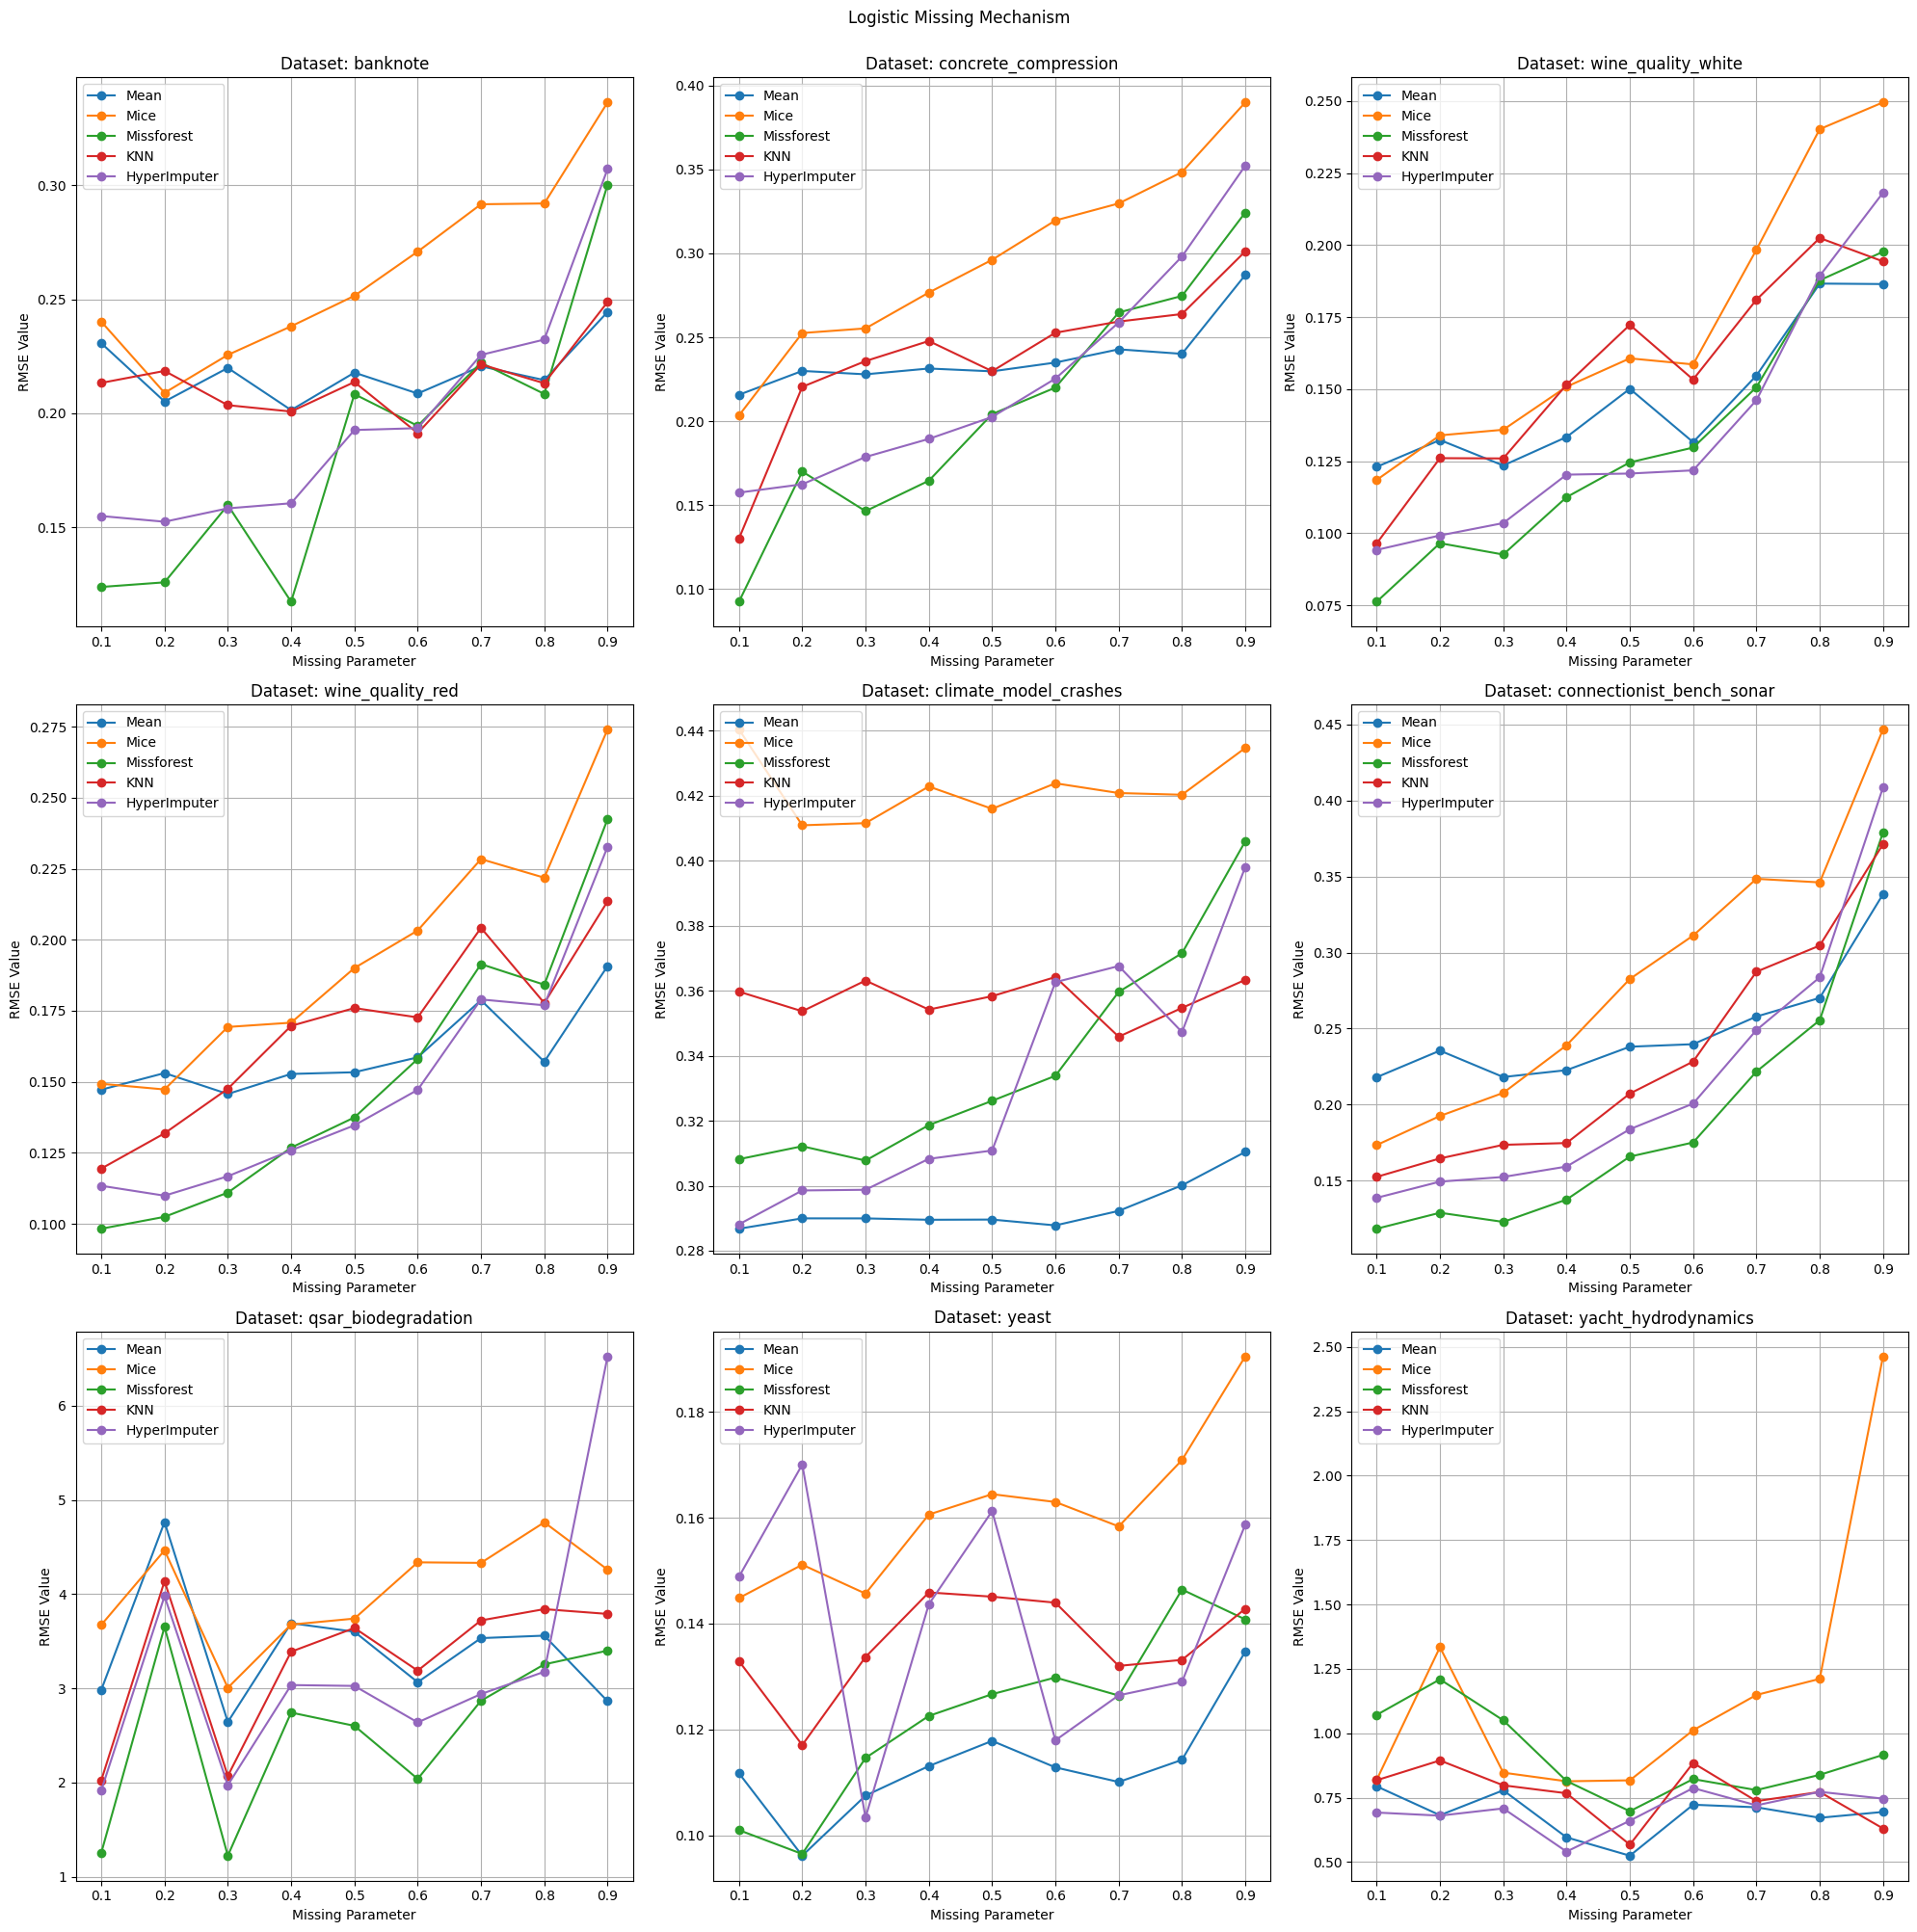

In [24]:
datalist = ["banknote","concrete_compression",
            "wine_quality_white","wine_quality_red",
            "climate_model_crashes",
            "connectionist_bench_sonar","qsar_biodegradation",
            "yeast","yacht_hydrodynamics"
            ]

columns_to_plot = ['Mean', 'Mice', 'Missforest', 'KNN', 'HyperImputer']

# Create subplots with 5 rows and 2 columns
fig, axs = plt.subplots(3, 3, figsize=(20, 20))  # Adjust figsize as needed

# Flatten the axs array to iterate over subplots
axs = axs.flatten()

# Loop through each dataset and create a subplot
for i, dataset in enumerate(datalist):
    merged_df = pd.DataFrame()
    for method in n_method:
        file_name_1 = f"{result_folder}/{method}/RMSE_{dataset}_logistic.csv"
        file_name_2 = f"{result_folder}/{method}/RMSE_{dataset}_missing_rate.csv"
        file_name_3 = f"{result_folder}/{method}/RMSE_{dataset}_missing_rate_.csv"

        if os.path.exists(file_name_1):
            df = pd.read_csv(file_name_1)
            merged_df = pd.concat([merged_df, df], axis=1)

        if os.path.exists(file_name_2):
            df = pd.read_csv(file_name_2)
            merged_df = pd.concat([merged_df, df], axis=1)

        if os.path.exists(file_name_3):
            df = pd.read_csv(file_name_3)
            merged_df = pd.concat([merged_df, df], axis=1)
    
    merged_df.rename(columns={'hyper_RMSE': 'HyperImputer'}, inplace=True)
    merged_df = merged_df.loc[:, ~merged_df.columns.duplicated()]
    merged_df[columns_to_plot] = merged_df[columns_to_plot].iloc[::-1].values

    # Plot each column on a separate subplot
    for j, column in enumerate(columns_to_plot):
        axs[i].plot(merged_df['Missing_Rule'], merged_df[column], label=column, marker='o')
    axs[i].set_title(f'Dataset: {dataset}')
    axs[i].set_xlabel('Missing Parameter')
    axs[i].set_ylabel('RMSE Value')
    axs[i].legend()
    axs[i].grid(True)


plt.suptitle("Logistic Missing Mechanism", y=1)
# Adjust layout
plt.tight_layout()


# Show the subplots
plt.show()

## Quantile RMSE

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


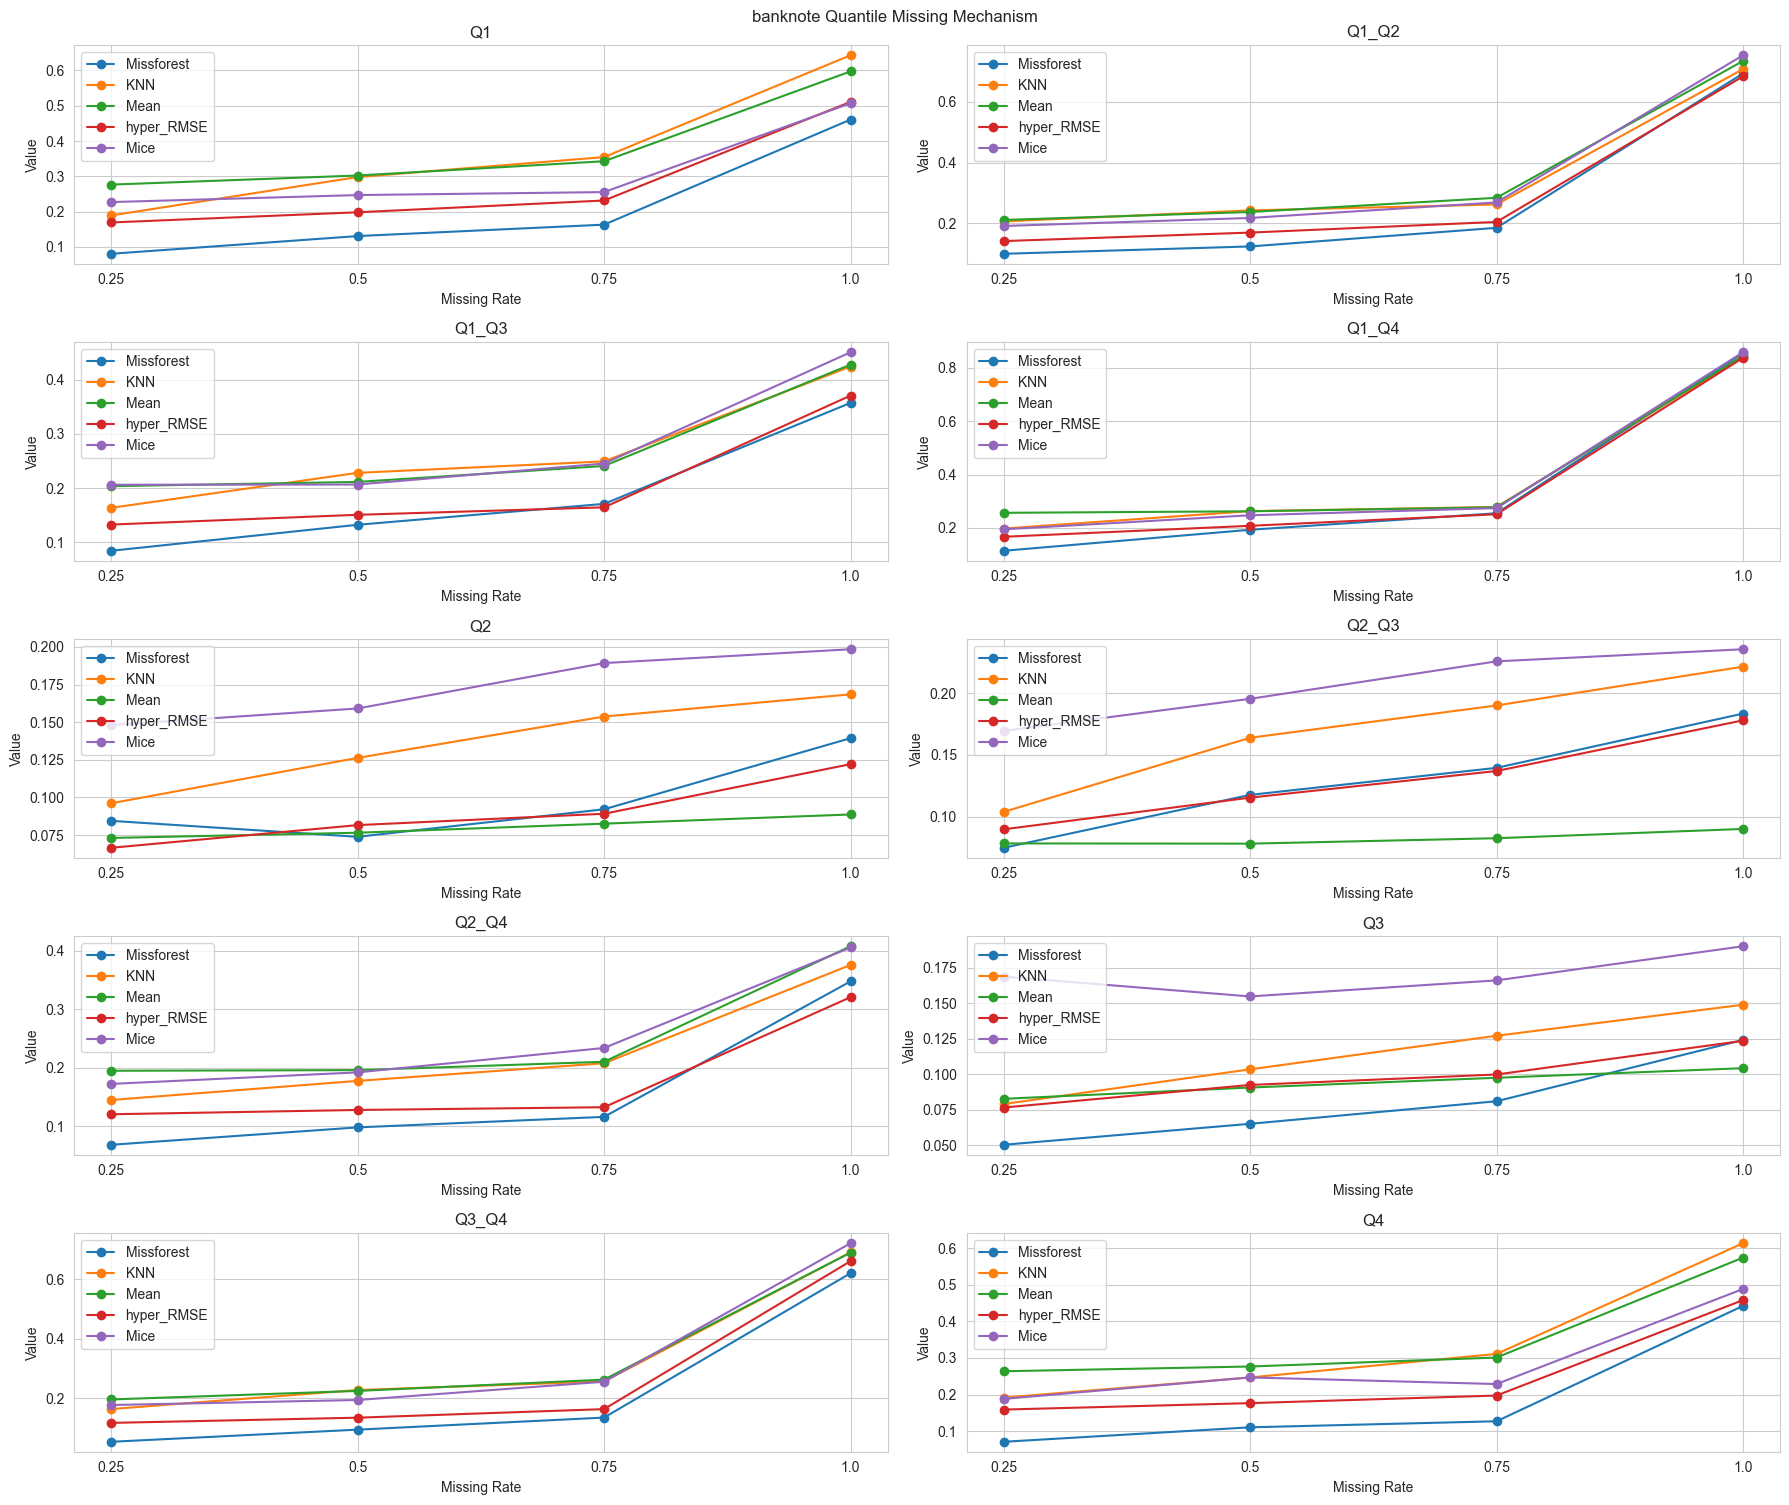

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


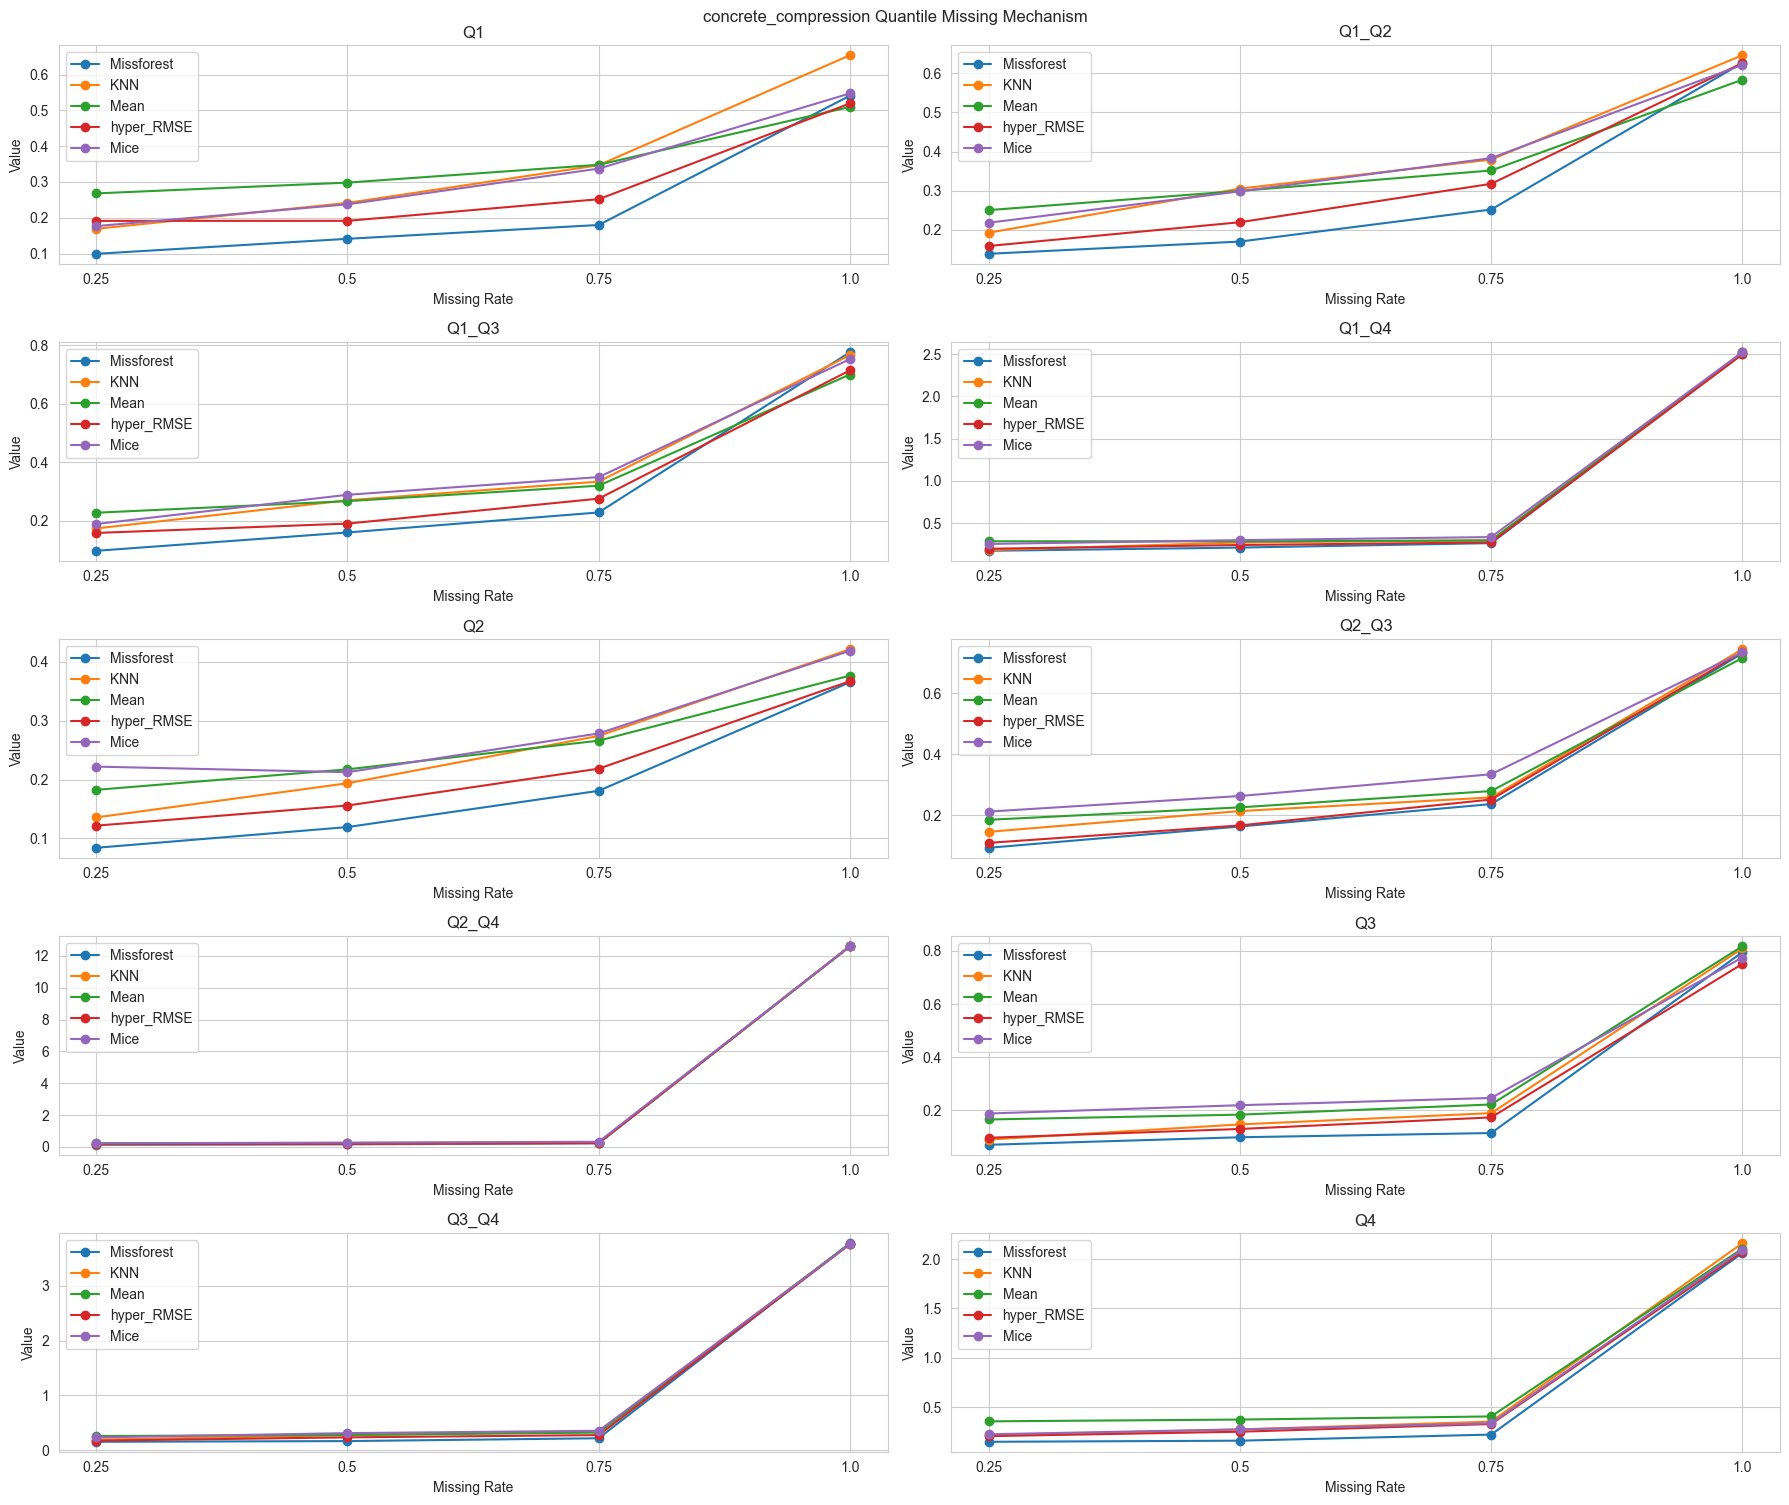

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


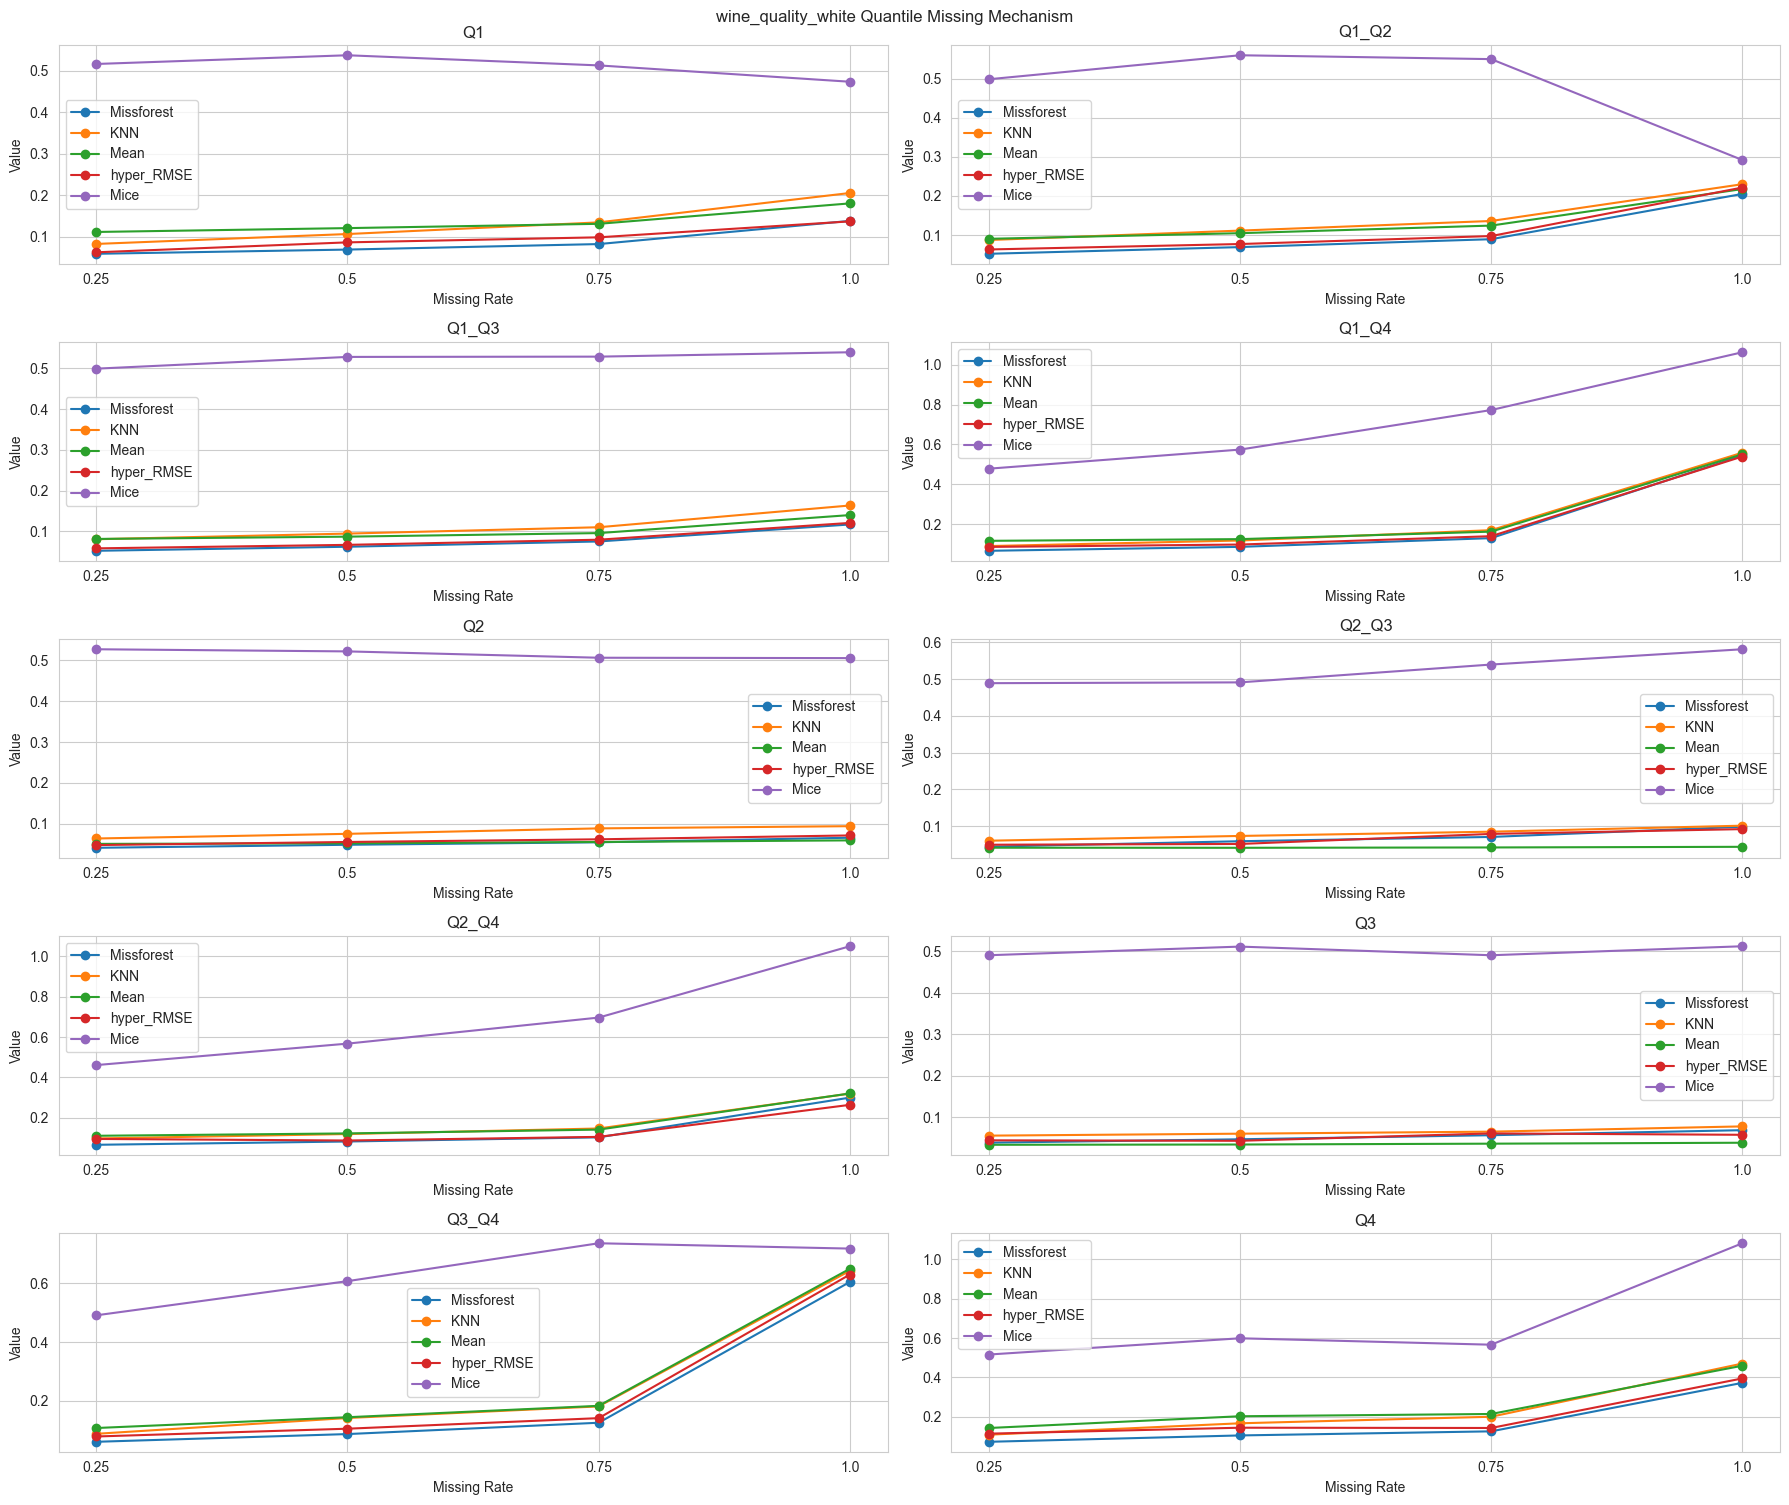

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


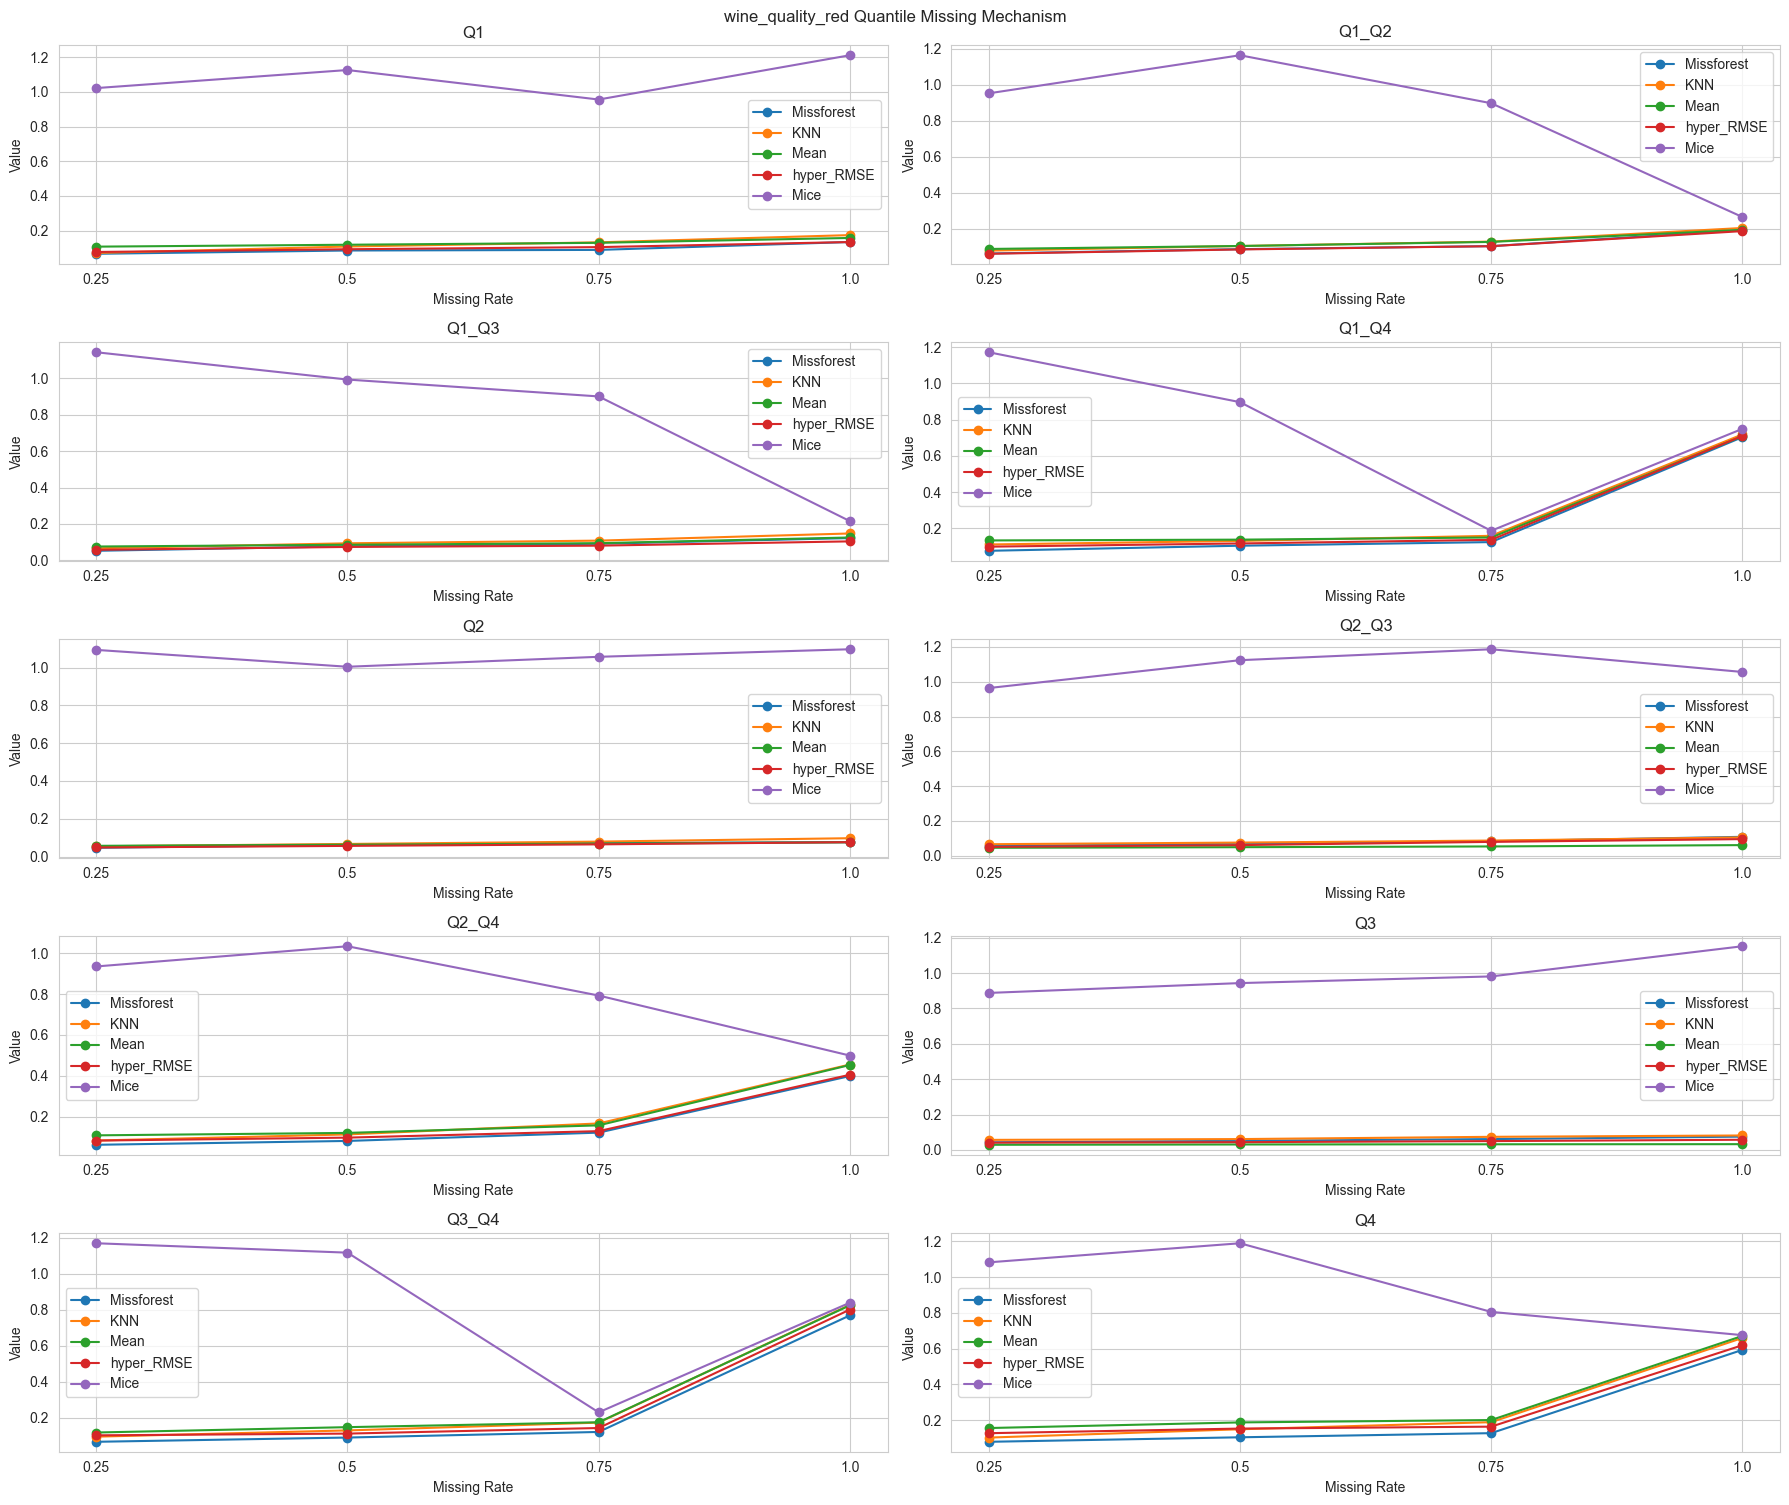

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


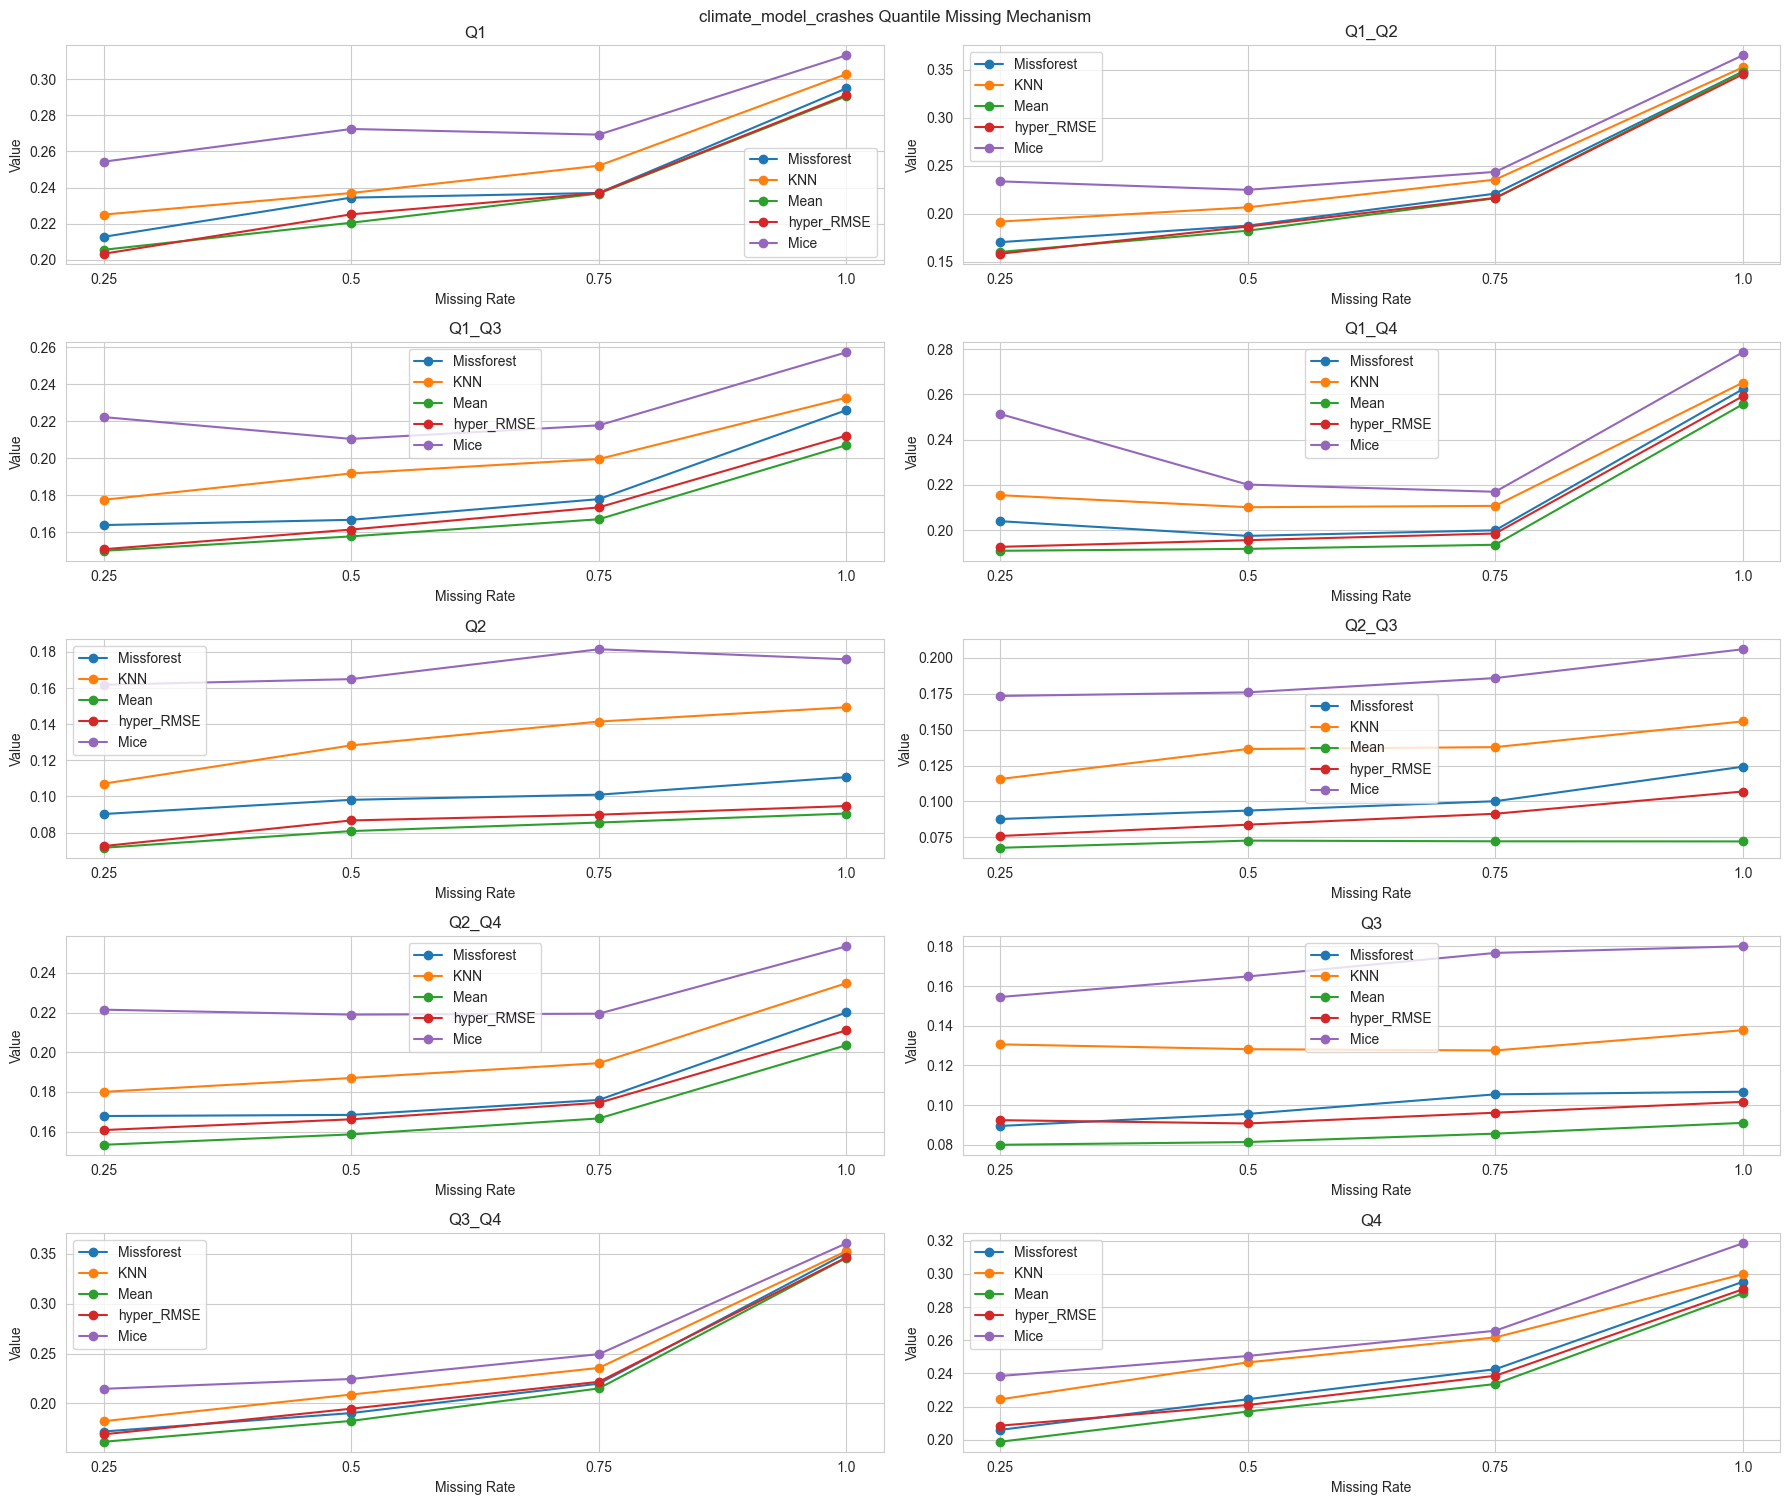

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


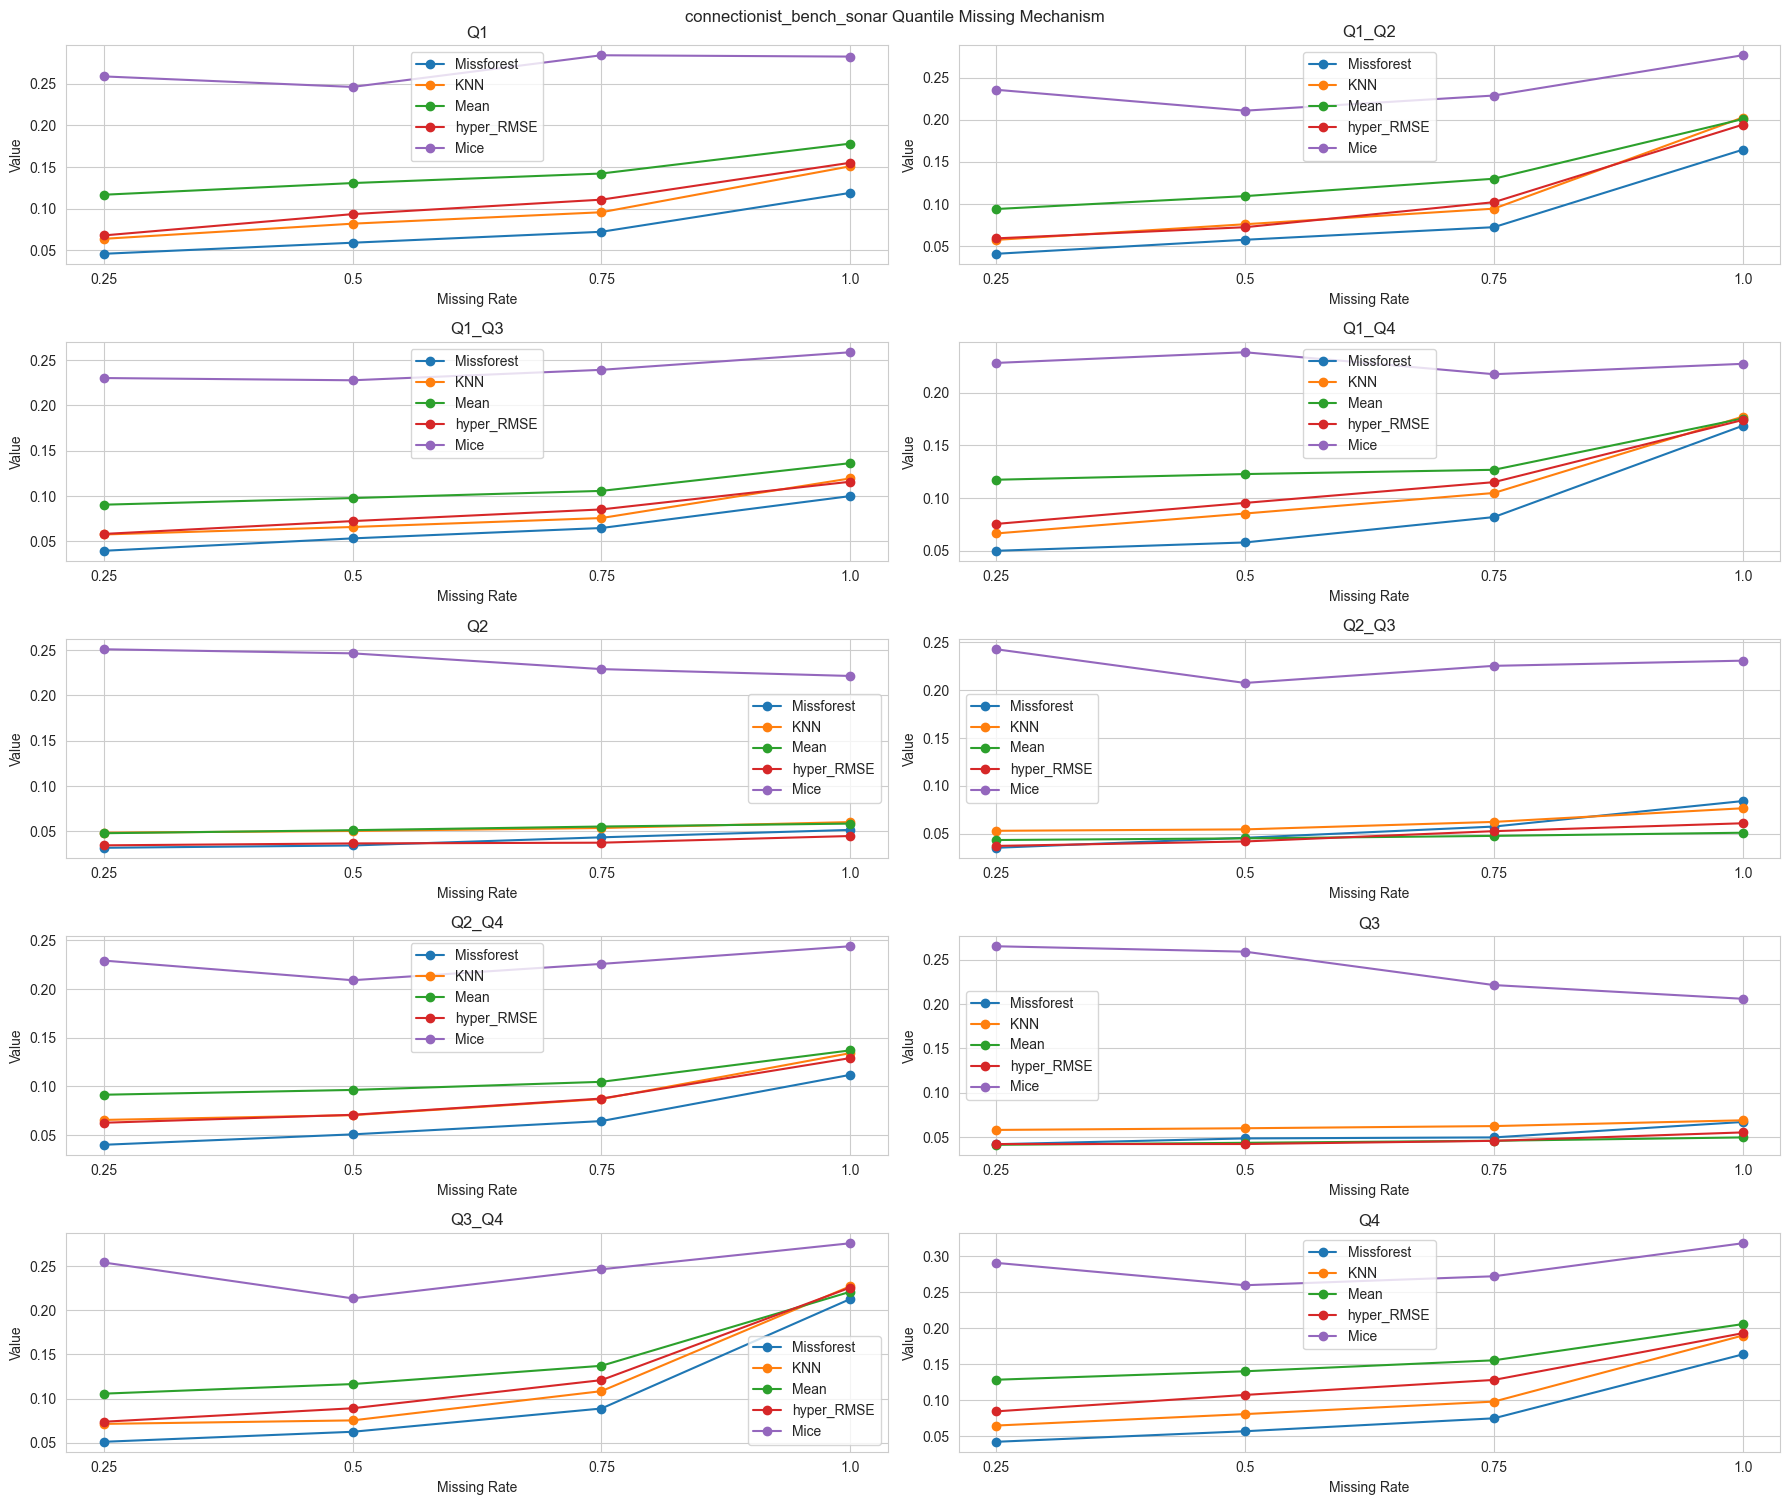

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


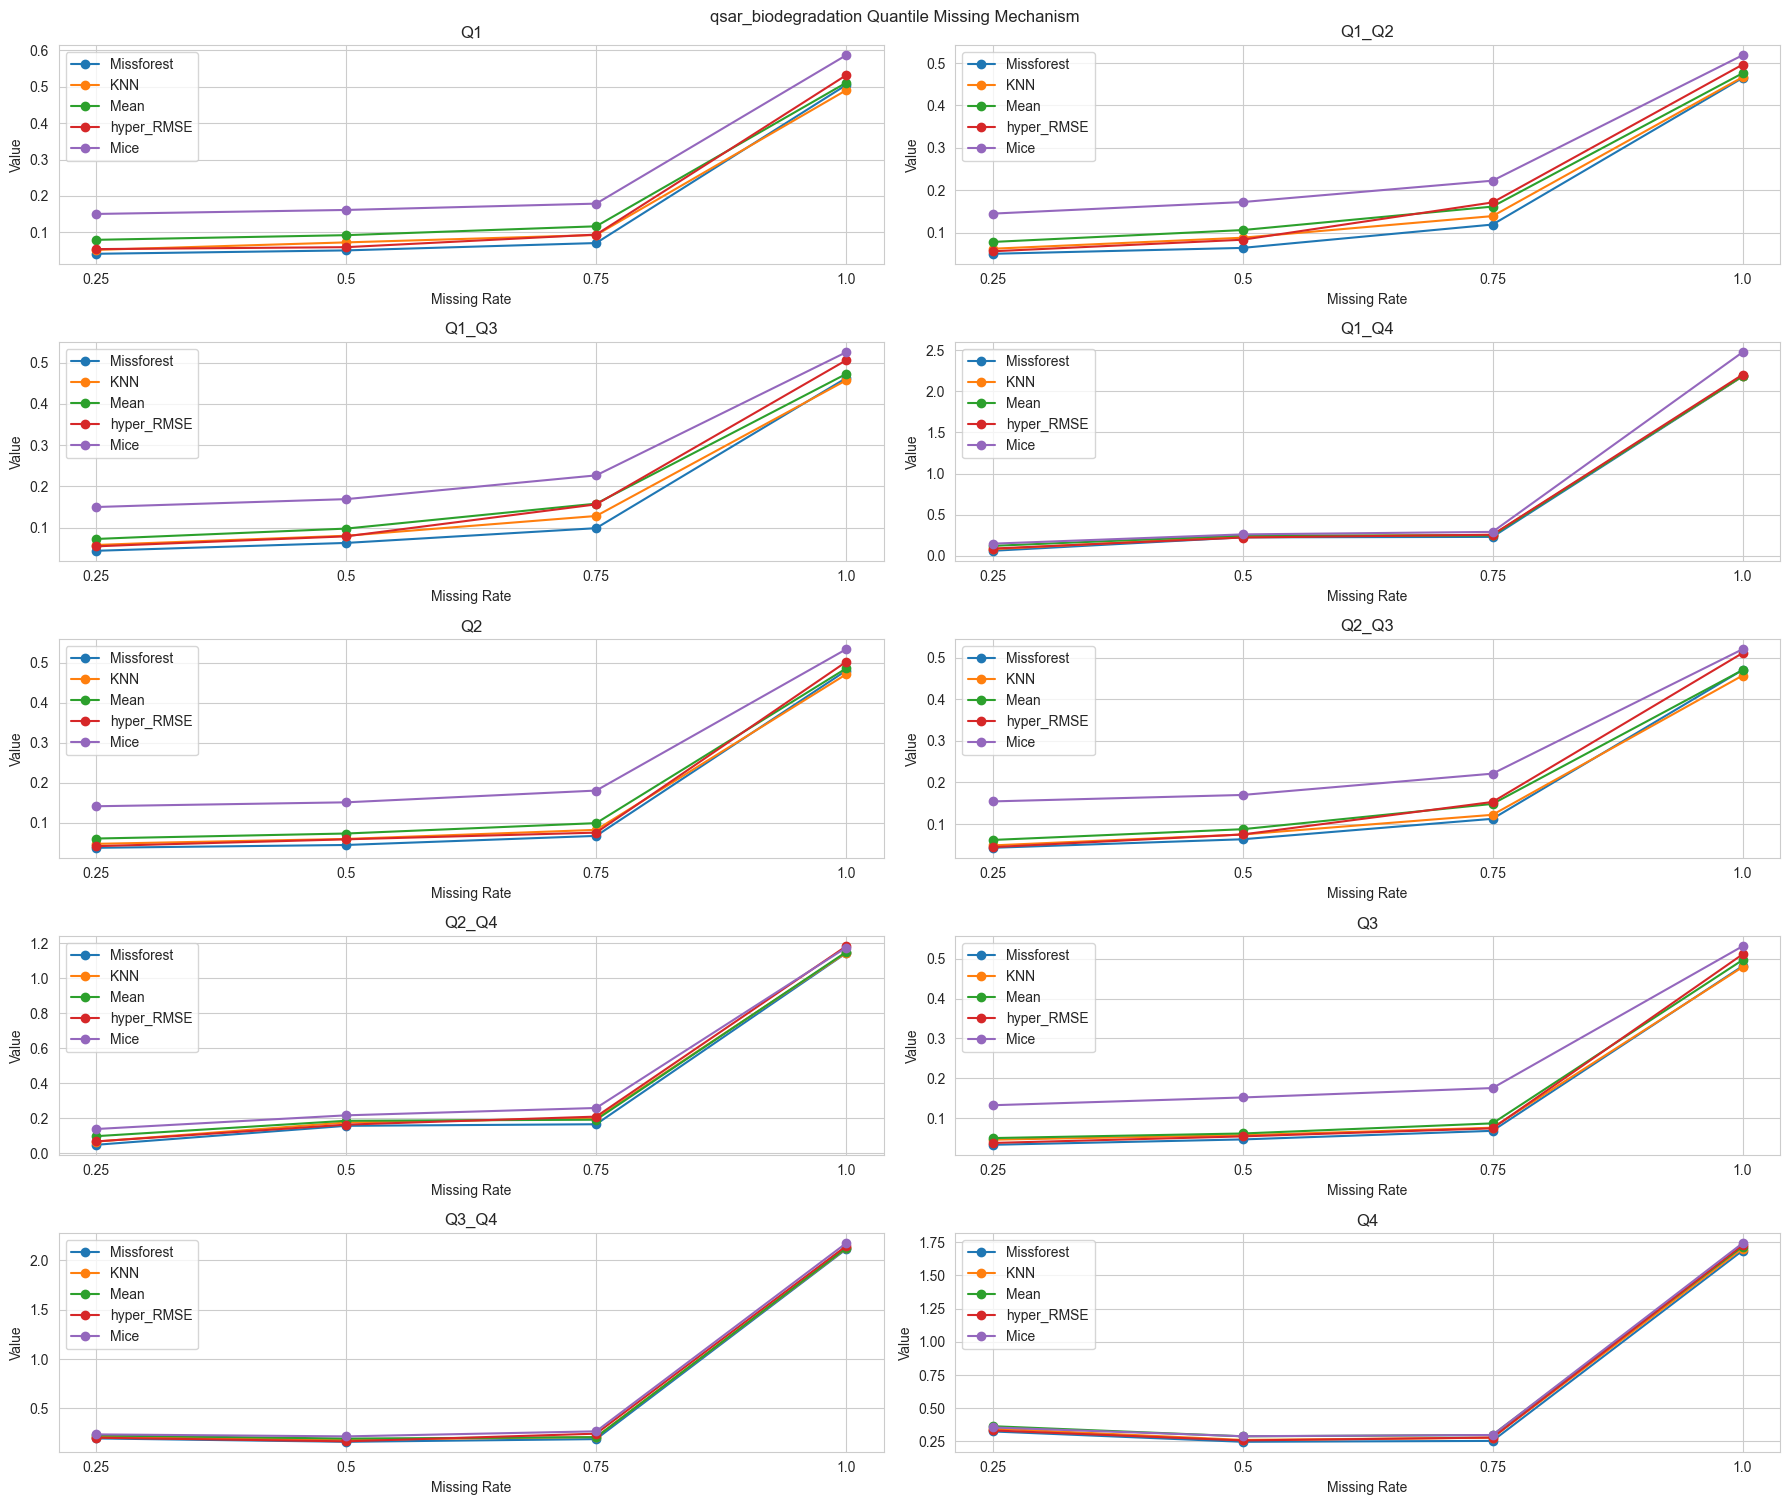

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


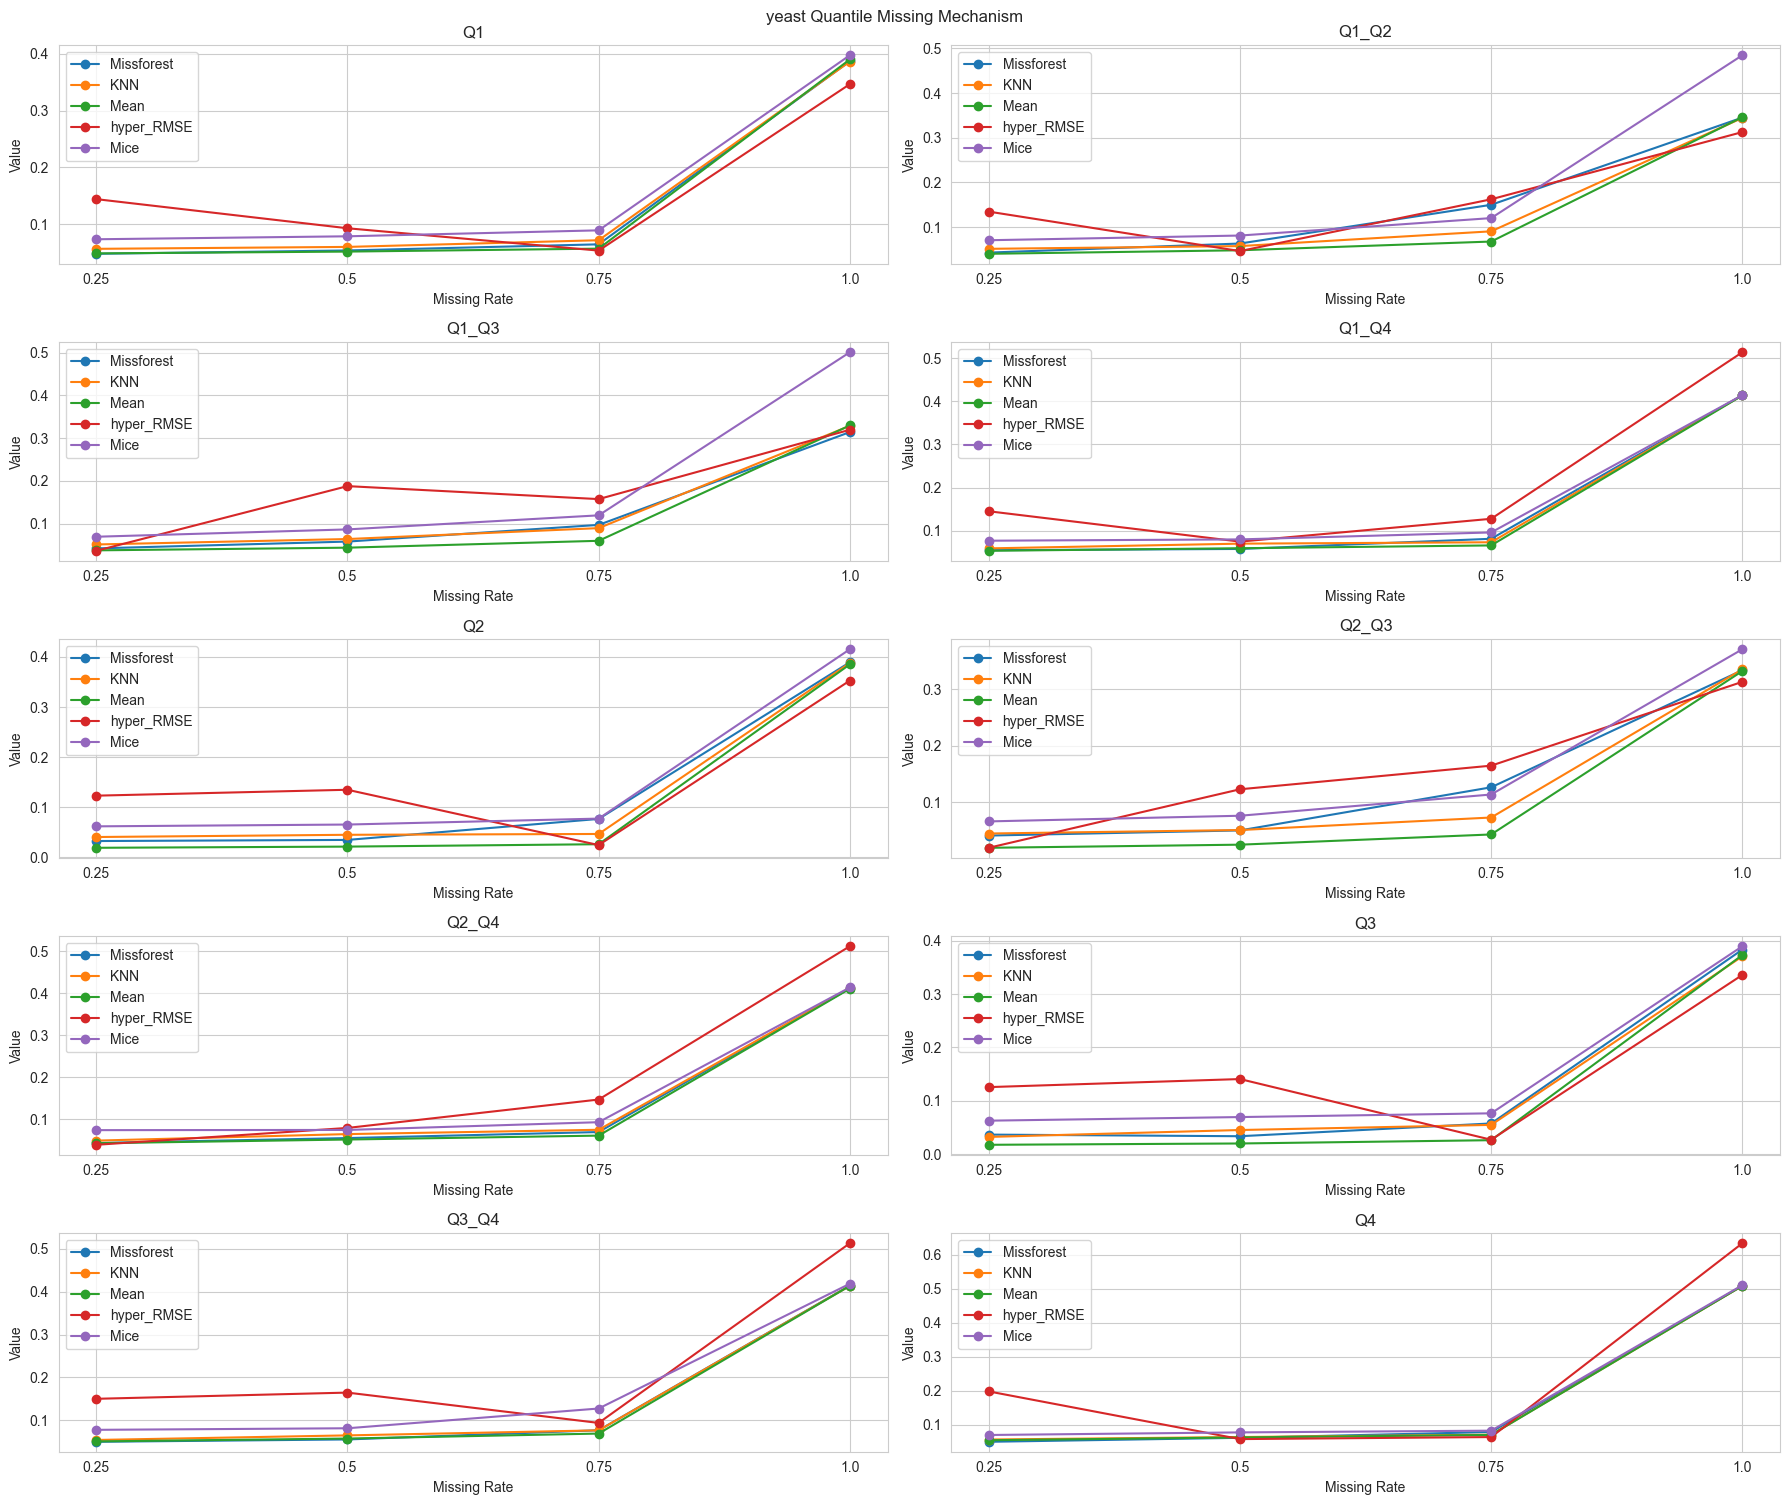

C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
C:\Users\Epochoid\AppData\Local\Temp\ipykernel_11044\2596025976.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')


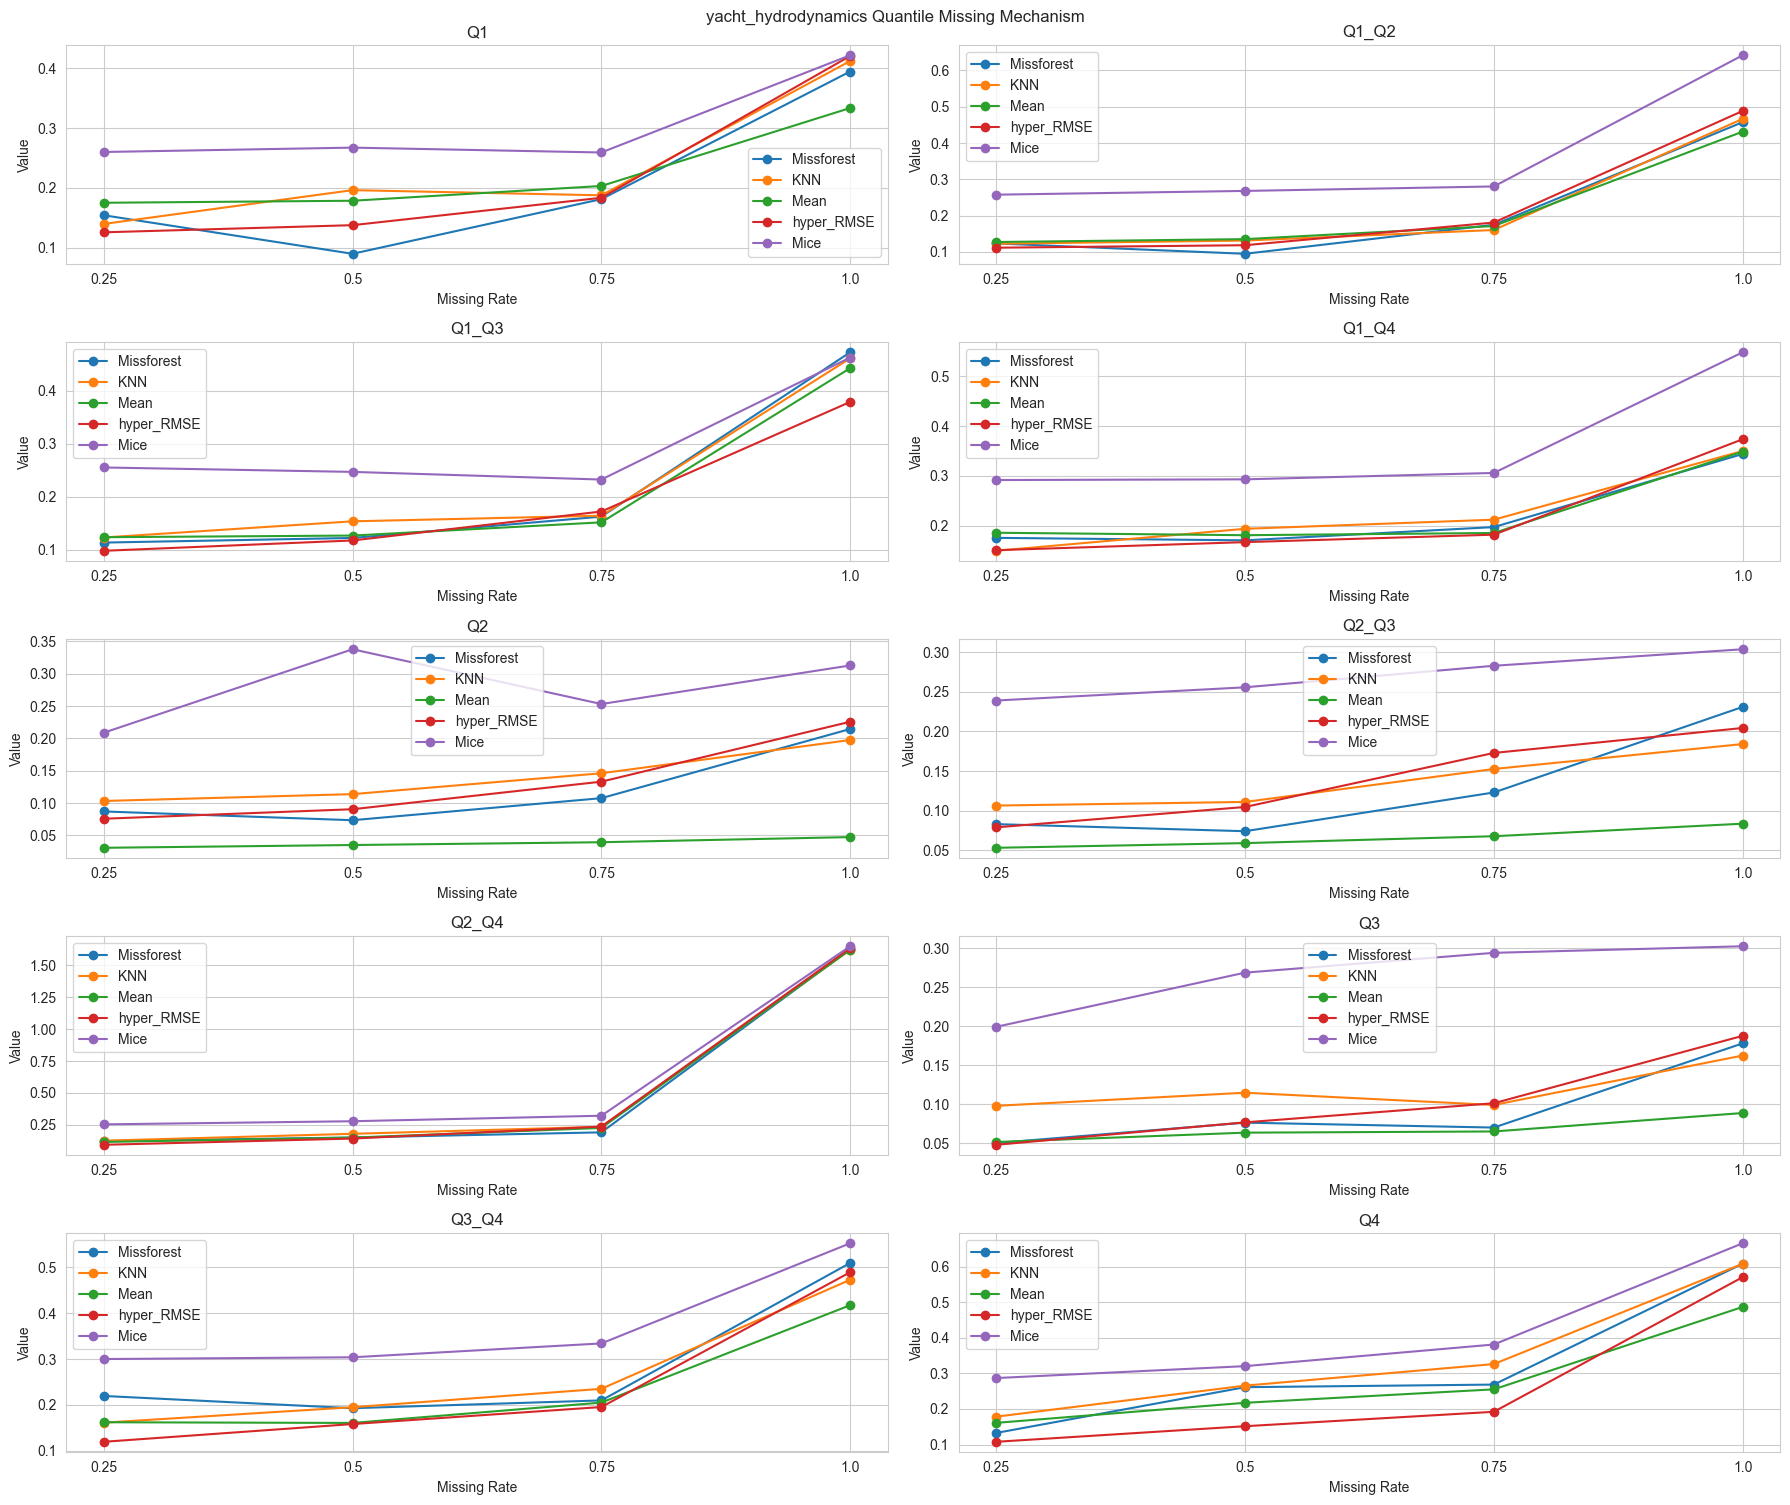

In [286]:
datalist = ["banknote","concrete_compression",
            "wine_quality_white","wine_quality_red",
            "climate_model_crashes",
            "connectionist_bench_sonar","qsar_biodegradation",
            "yeast","yacht_hydrodynamics"
            ]


for dataset in datalist:
    merged_df = pd.DataFrame()
    for method in n_method:
        file_name_1 = f"{result_folder}/{method}/RMSE_{dataset}_quantile.csv"
        file_name_2 = f"{result_folder}/{method}/RMSE_{dataset}_quantile_full.csv"
        file_name_3 = f"{result_folder}/{method}/RMSE_{dataset}_quantile_full_.csv"

        if os.path.exists(file_name_1):
            df = pd.read_csv(file_name_1)
            merged_df = pd.concat([merged_df, df],axis=1)
        
        if os.path.exists(file_name_2):
            df = pd.read_csv(file_name_2)
            merged_df = pd.concat([merged_df, df], axis=1)
        
        if os.path.exists(file_name_3):
            df = pd.read_csv(file_name_3)
            merged_df = pd.concat([merged_df, df], axis=1)

    df = merged_df.loc[:, ~merged_df.columns.duplicated()]

    #df['Missing_Rule'] = df['Missing_Rule'].str.replace('complete', '1.0').str.replace('partial', '0.5')
    df['Rule_Name'] = df['Missing_Rule'].str.extract(r'(.+)_\d+\.\d+')
    df['Missing_Rate'] = df['Missing_Rule'].str.extract(r'(\d\.\d+)')
    df = df.drop(["Missing_Rule"], axis=1)

    pivot_df = df.pivot(index='Rule_Name', columns='Missing_Rate')

    column_names_set = set(pivot_df.columns.get_level_values(0))
    new_df = pd.DataFrame()

    for method in column_names_set:
        temp_df = pivot_df[method].reset_index(level=["Rule_Name"])
        temp_df["Method"] = method

        new_df = pd.concat([new_df, temp_df]) 

    new_df = new_df.reset_index(drop=True)

    grouped = new_df.groupby('Rule_Name')
    num_groups = len(grouped)

    # Create subplots in a 2x5 grid
    fig, axs = plt.subplots(5, 2, figsize=(18, 15))
    axs = axs.flatten()

    for i, (rule_name, group) in enumerate(grouped):
        group = group.drop(["Rule_Name"], axis=1)
        col_name = group['Method'].values
        group = group.transpose()
        group.columns = col_name
        df = group[:-1]

        # Create a line plot for the current group on its own subplot
        ax = axs[i]
        for method in df.columns:
            if method !="miracle_RMSE":
                ax.plot(df.index, df[method], marker='o', label=method)
        ax.set_xlabel('Missing Rate')
        ax.set_ylabel('Value')
        ax.set_title(rule_name)
        ax.legend()

    # Adjust spacing between subplots
    plt.tight_layout()
    plt.suptitle(f"{dataset} Quantile Missing Mechanism", y=1)
    # Show the plots
    plt.show()

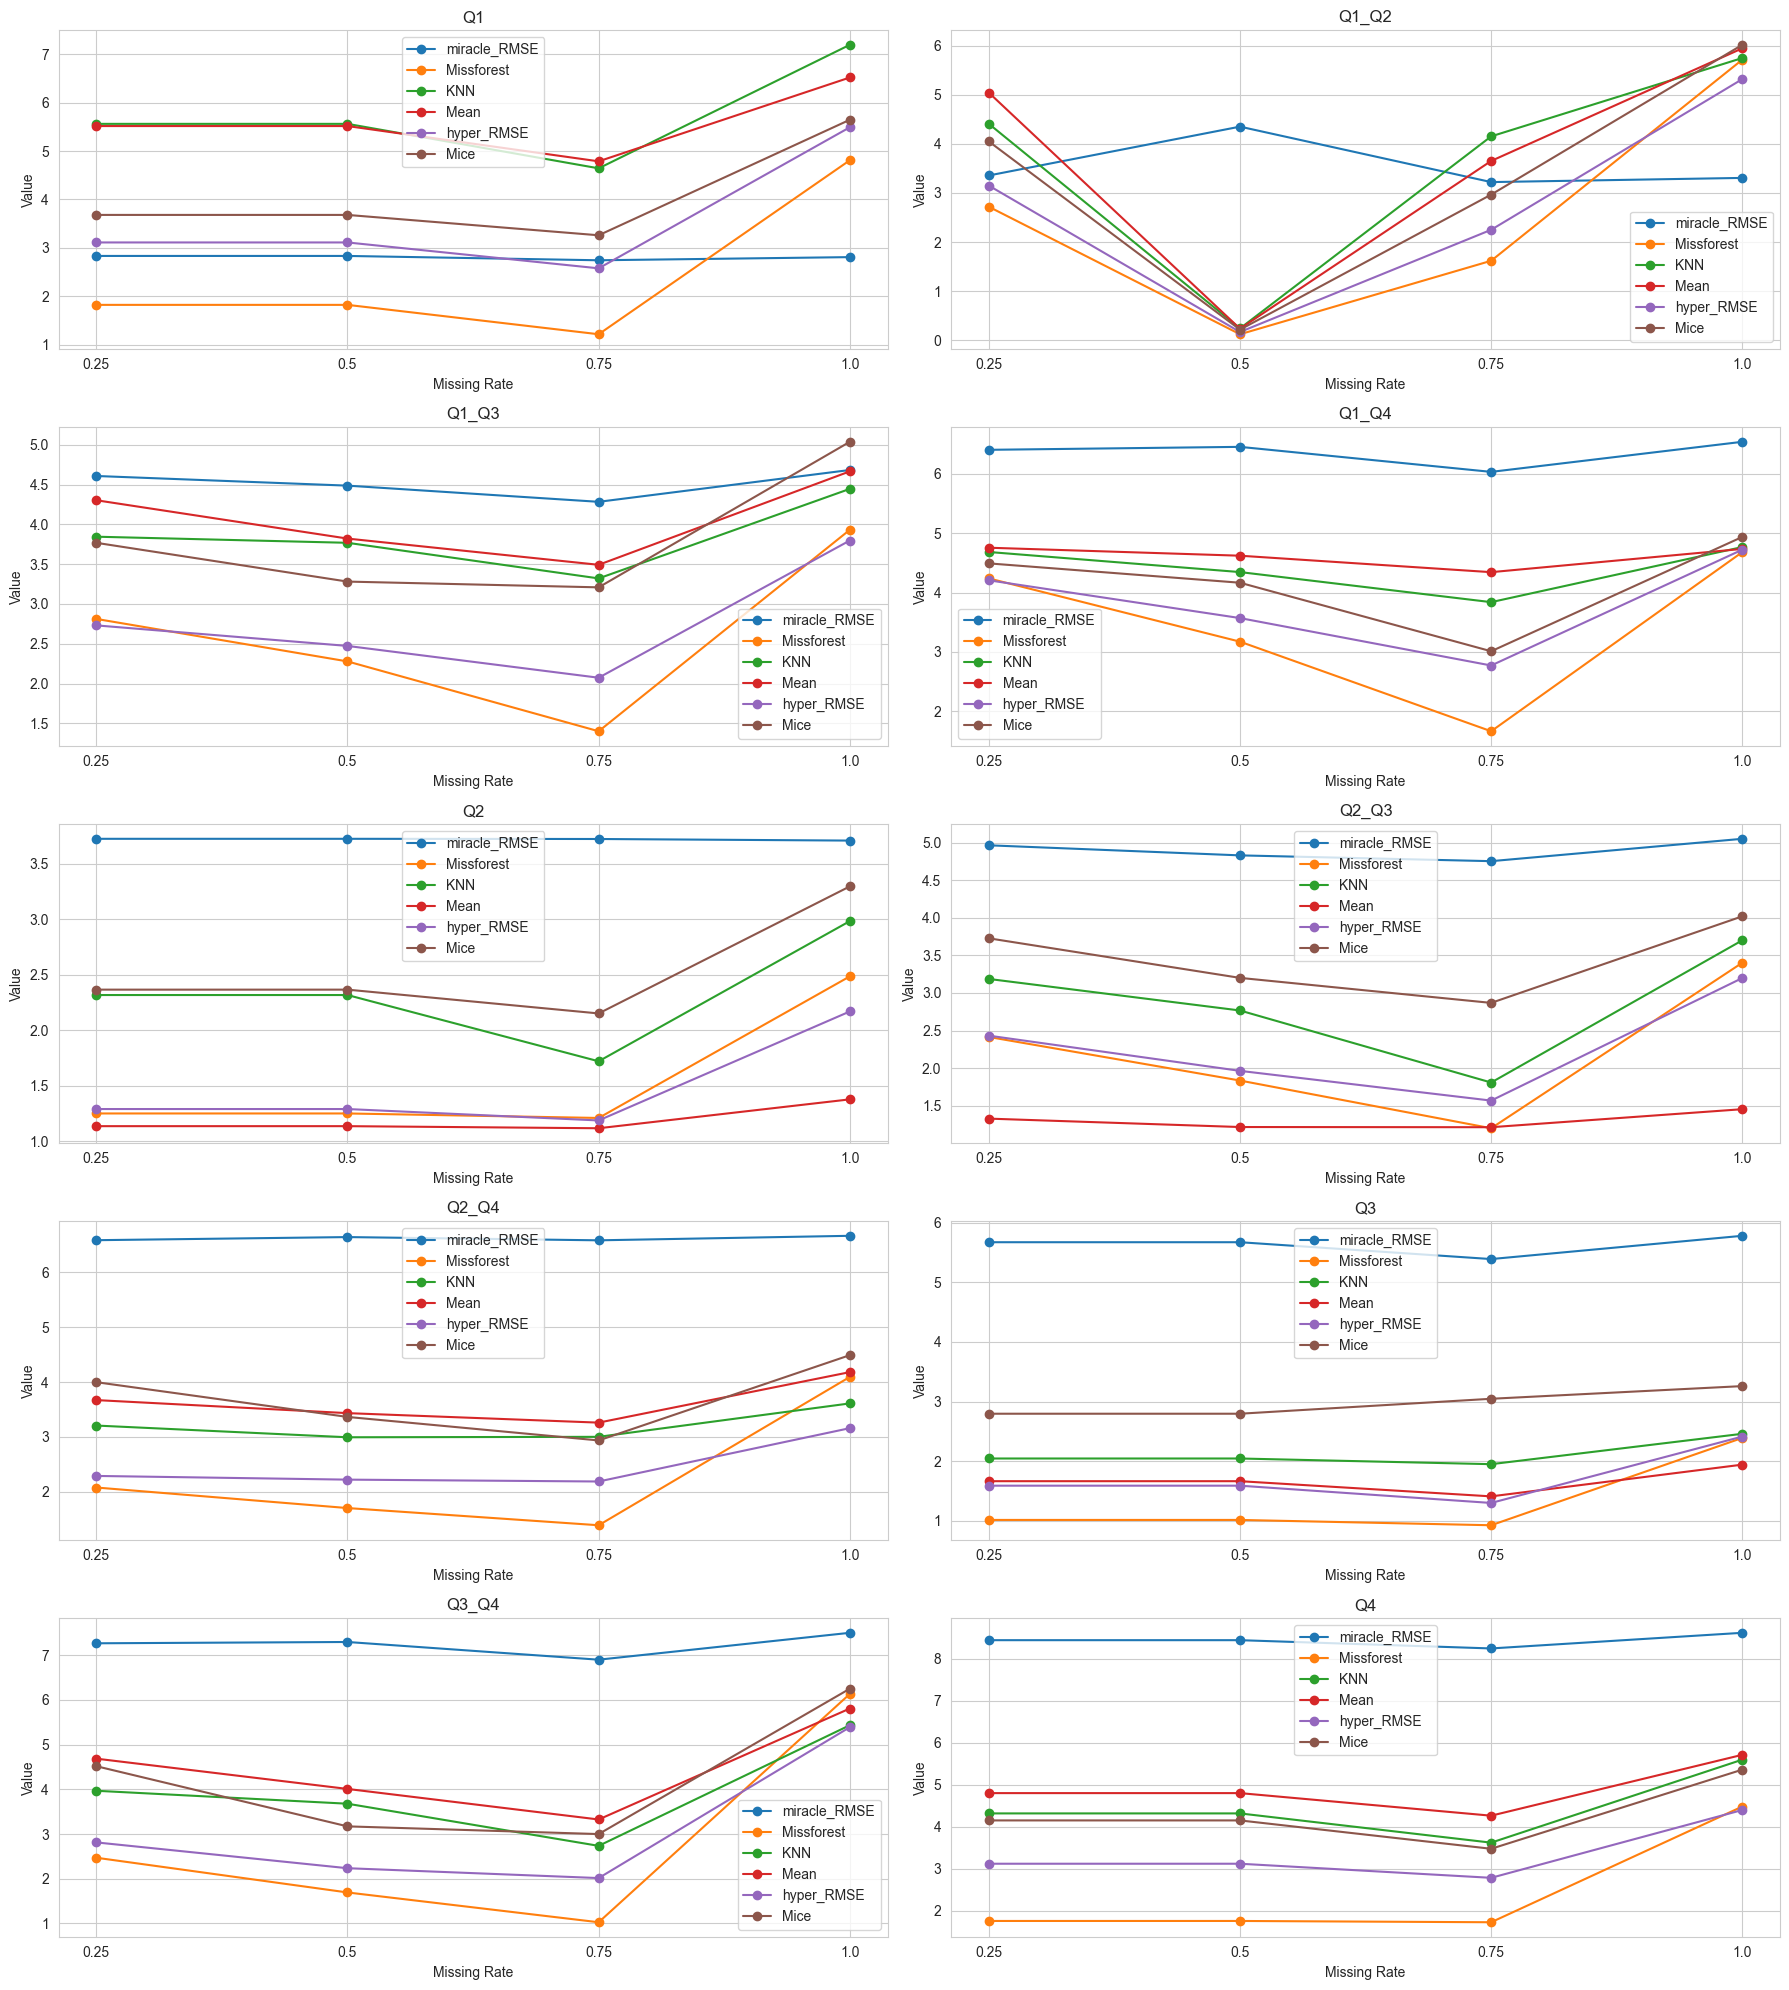